# 1. Fourieranalyse lang andauernder Signale
## a) Routine zum Einlesen:
import pyaudio
import numpy
import matplotlib.pyplot as plt
import time
import os
import re

def find_last_numbered_file(directory):
    pattern = r'^audioaufname_(\d+)'  # Muster, um nach Dateien mit dem Namen 'audio_#' zu suchen

    existing_files = [file for file in os.listdir(directory) if re.match(pattern, file)]
    numbers = []

    for file_name in existing_files:
        match = re.match(pattern, file_name)
        if match:
            numbers.append(int(match.group(1)))

    if numbers:
        return max(numbers)
    else:
        return 0  # Wenn keine Dateien gefunden werden, starte bei 0

directory = r'TestdatenJona'  # Hier den Pfad zu deinem Verzeichnis eintragen

last_number = find_last_numbered_file(directory)
next_number = last_number + 1

next_filename = f'TestdatenJona\\audioaufname_{next_number}'
print(f'Der nächste Dateiname sollte {next_filename} sein.')


FORMAT = pyaudio.paInt16
SAMPLEFREQ = 44100
FRAMESIZE = 1024
NOFFRAMES = 220
p = pyaudio.PyAudio()
print('running')
stream = p.open(format=FORMAT,channels=1,rate=SAMPLEFREQ,
input=True,frames_per_buffer=FRAMESIZE)
data = stream.read(NOFFRAMES*FRAMESIZE)
decoded = numpy.frombuffer(data, dtype=int);
stream.stop_stream()
stream.close()
p.terminate()
print('done')
plt.plot(decoded)
plt.ylabel('Frequenz')
plt.xlabel('Zeit')
plt.show()
filename = 'audioaufname' + str(time.time())
numpy.save(next_filename, decoded)

In [1]:
!pip install numpy
import numpy as np
!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
import os
import re
import time
import scipy.signal as sgl
import scipy as sp
from scipy import stats

In [2]:
# d)
%matplotlib inline
def zerteilen(array):
    gauss_window = np.array(sgl.windows.gaussian(512, 512 / 4))
    for i in range(0, len(array) - 511, 256):
        yield np.concatenate([[0] * i, list(gauss_window * array[i:i + 512]), [0] * (len(array) - (i + 512))])

def windowing_func(array):
    window = np.array(list(zerteilen(array)))
    return np.abs(np.fft.fft(window)).mean(0)

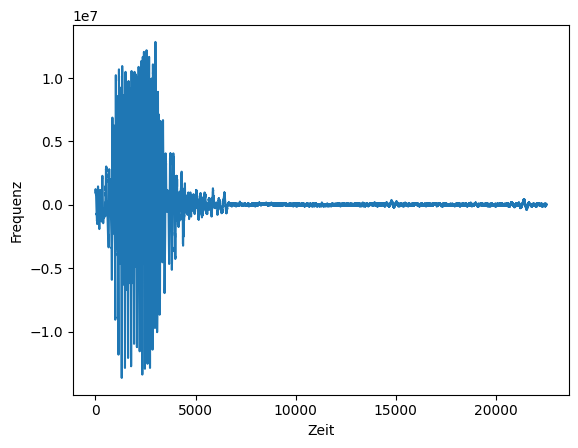

Detla t =  4.438920454545455e-05


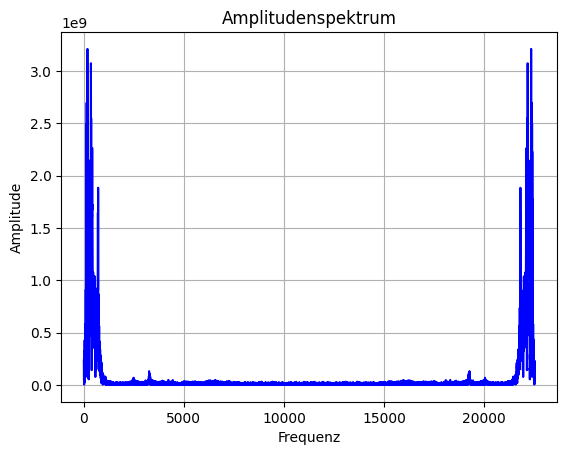

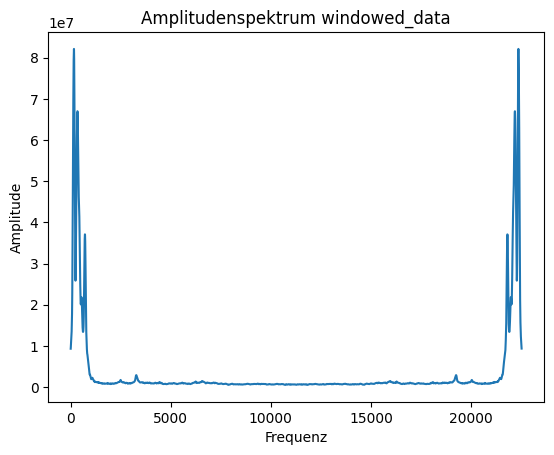

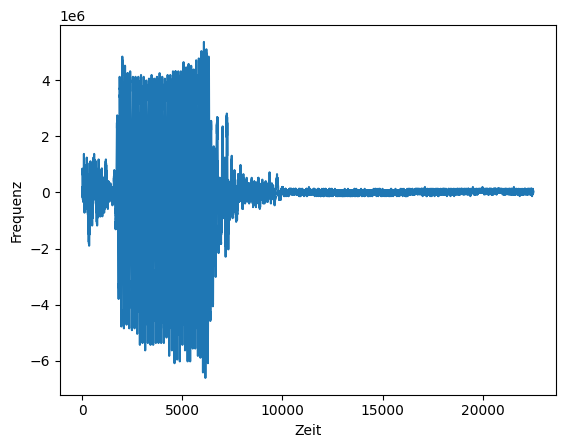

Detla t =  4.438920454545455e-05


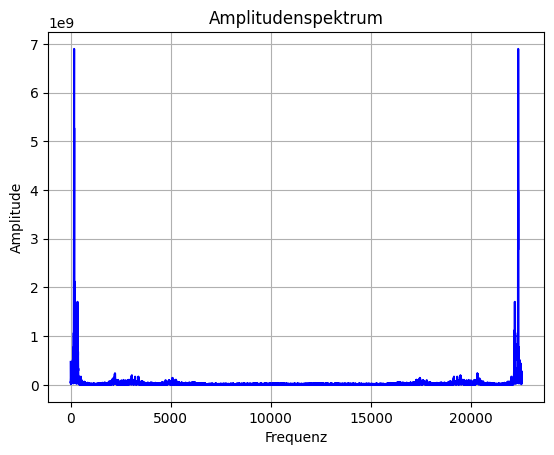

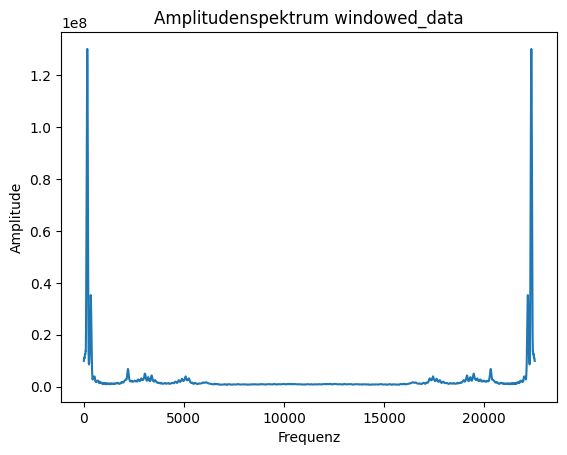

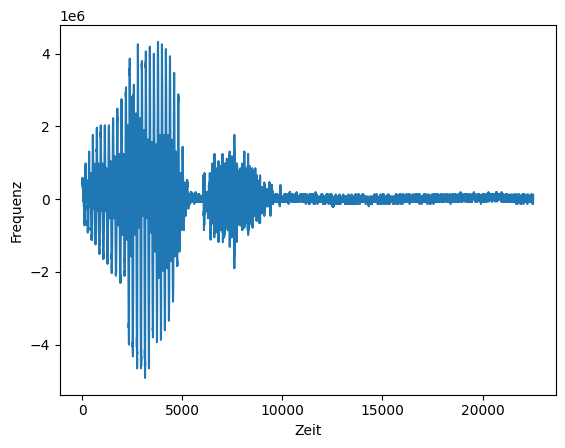

Detla t =  4.438920454545455e-05


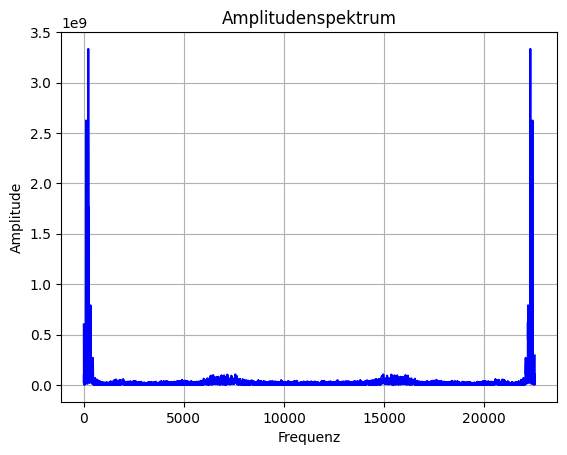

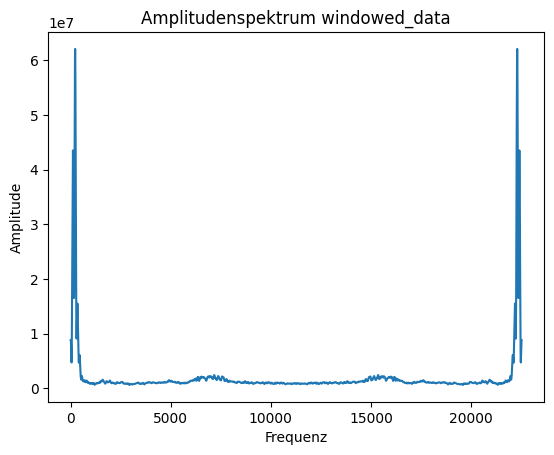

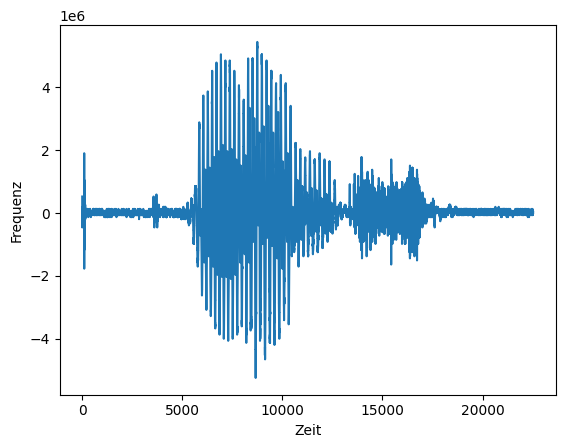

Detla t =  4.438920454545455e-05


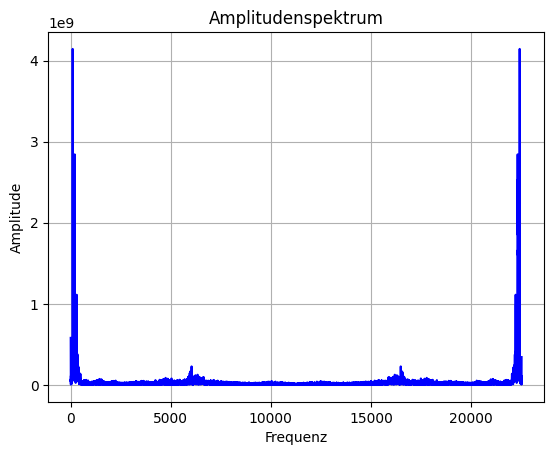

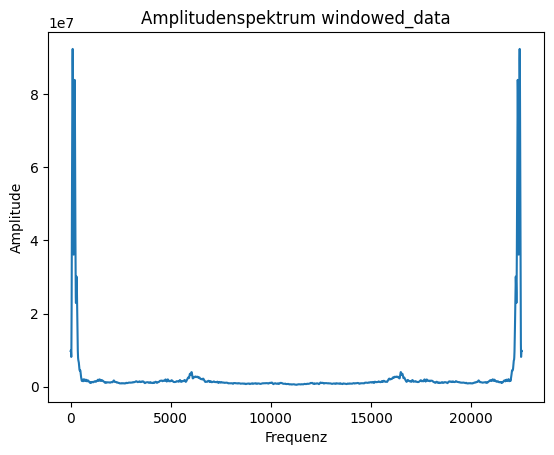

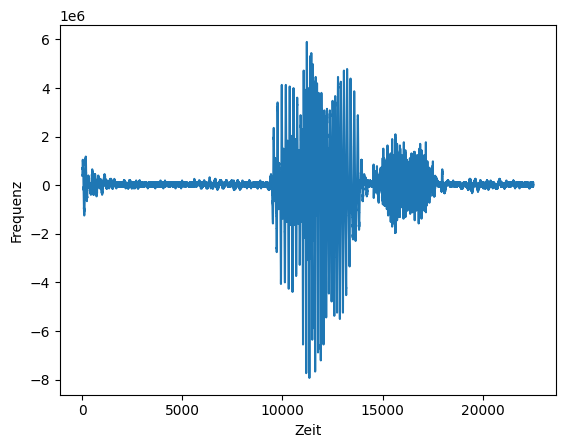

Detla t =  4.438920454545455e-05


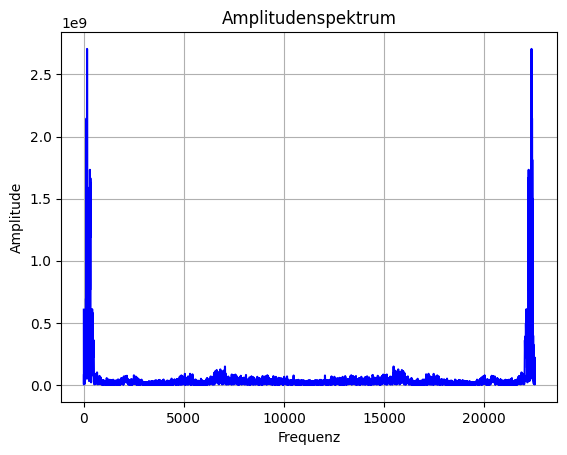

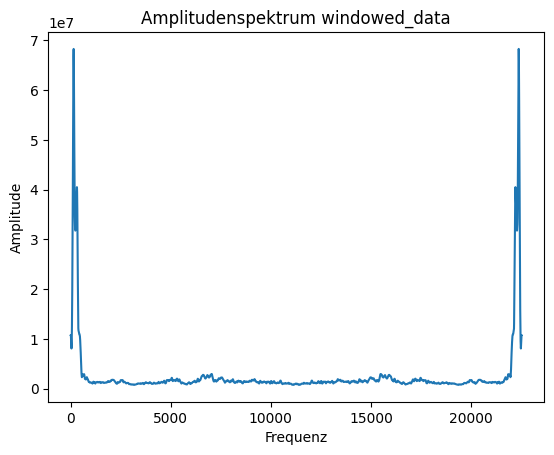

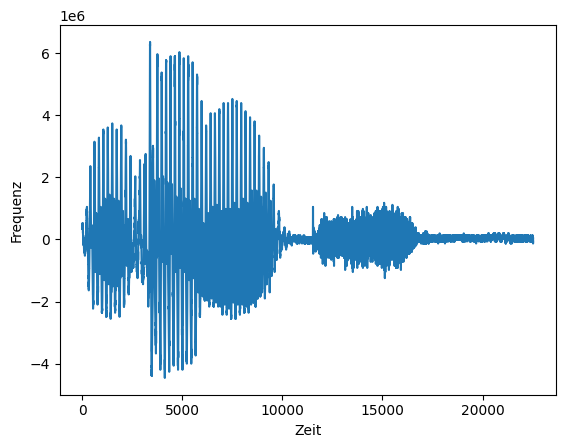

Detla t =  4.438920454545455e-05


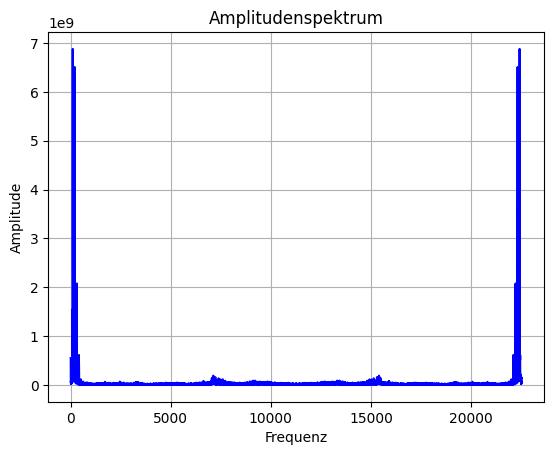

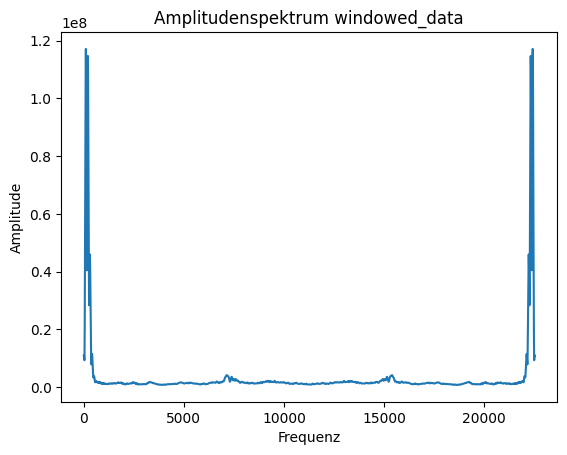

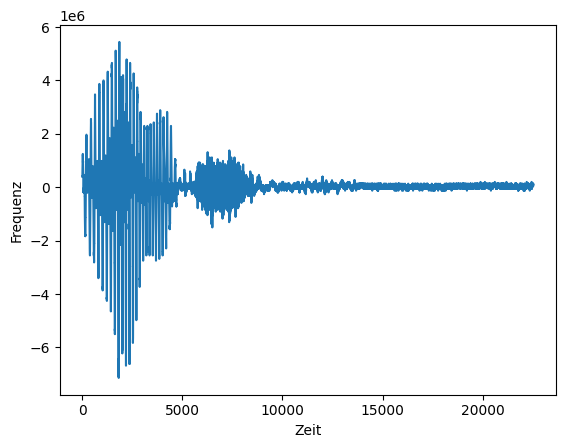

Detla t =  4.438920454545455e-05


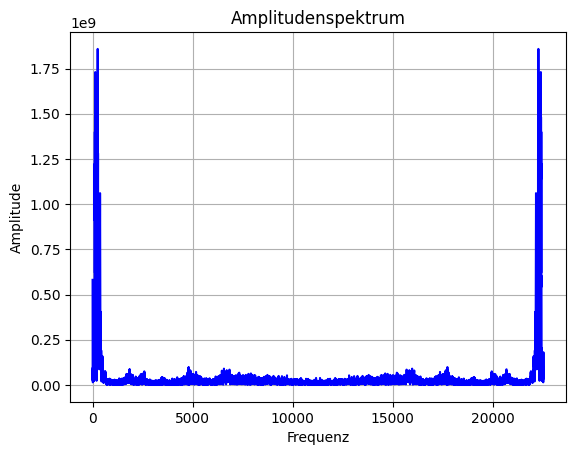

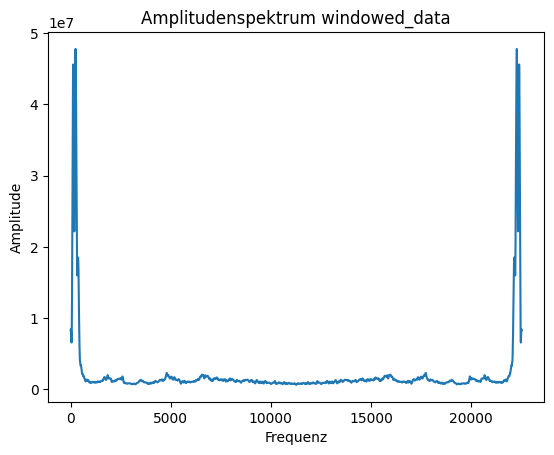

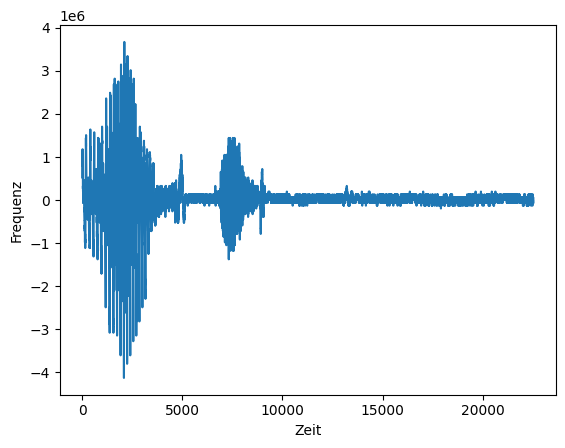

Detla t =  4.438920454545455e-05


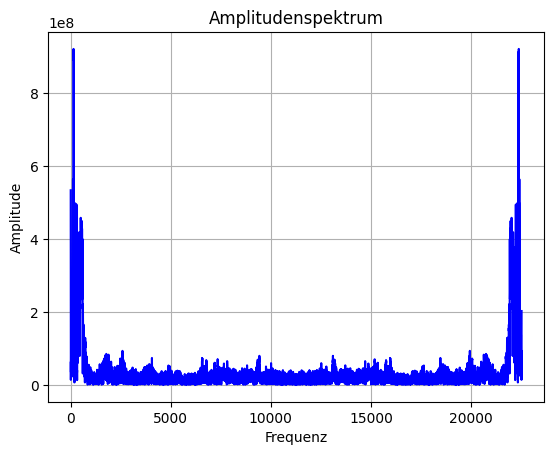

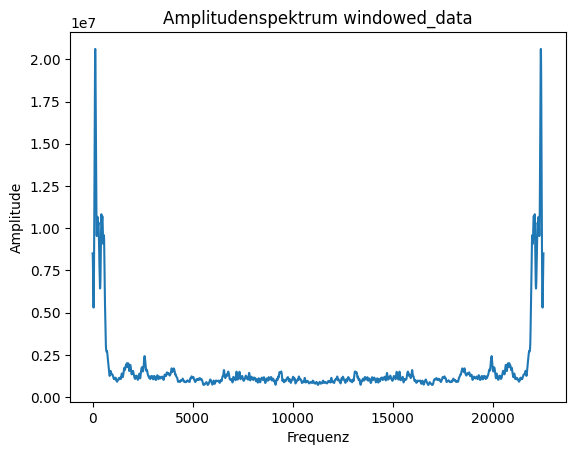

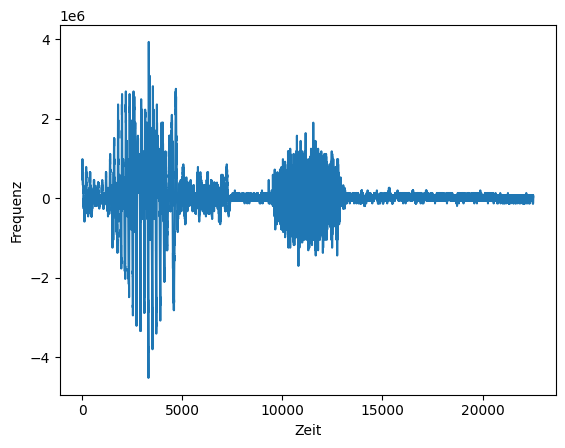

Detla t =  4.438920454545455e-05


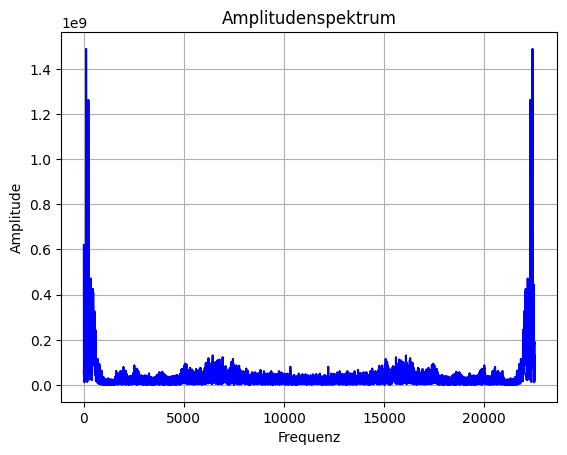

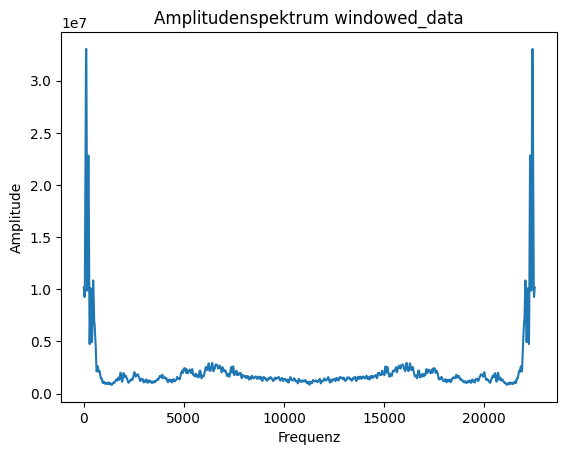

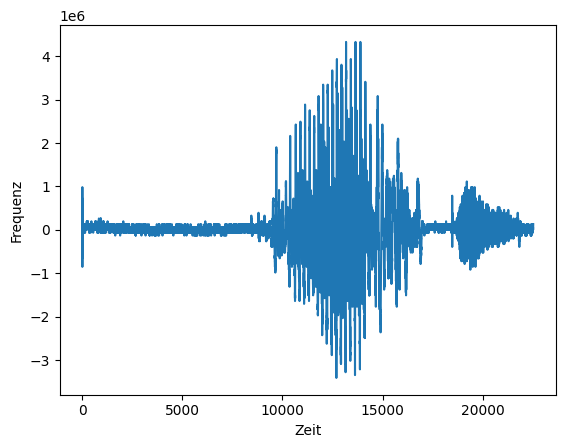

Detla t =  4.438920454545455e-05


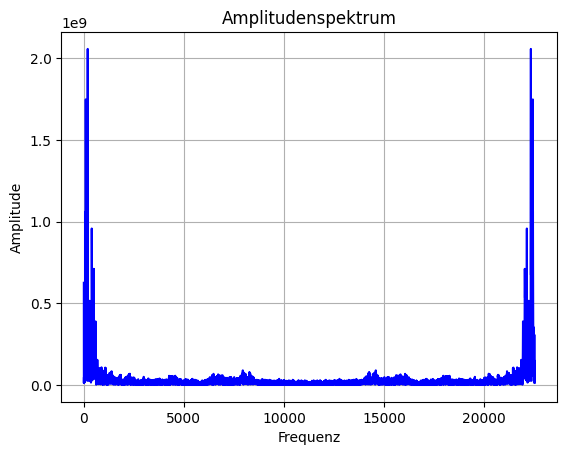

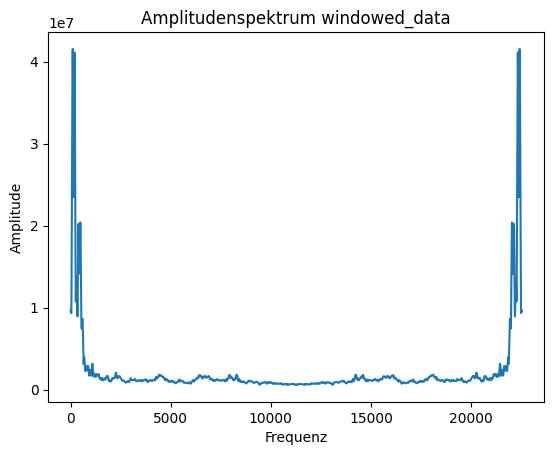

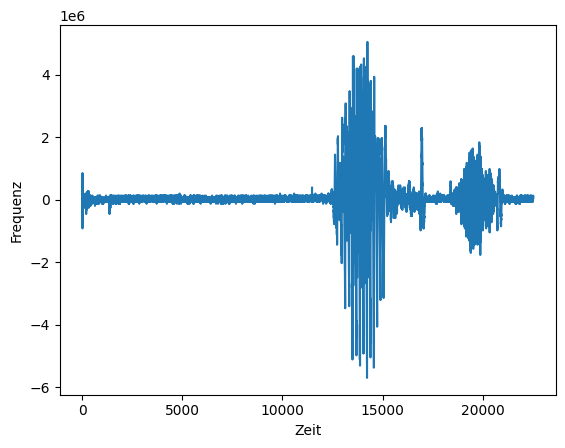

Detla t =  4.438920454545455e-05


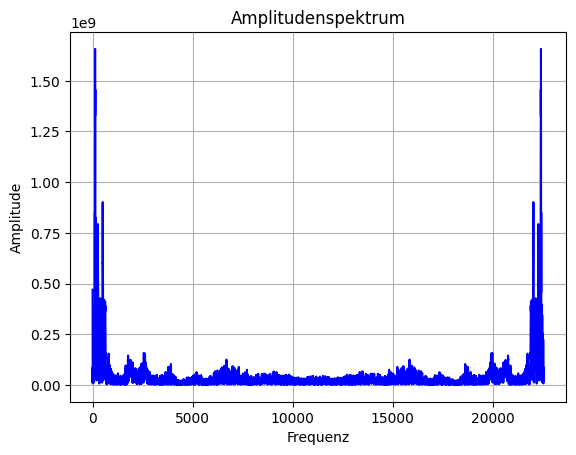

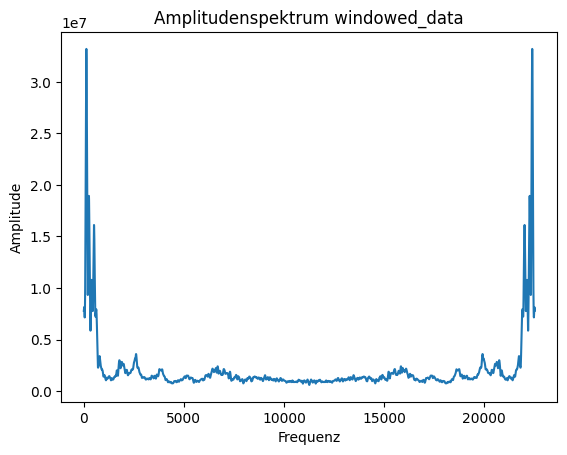

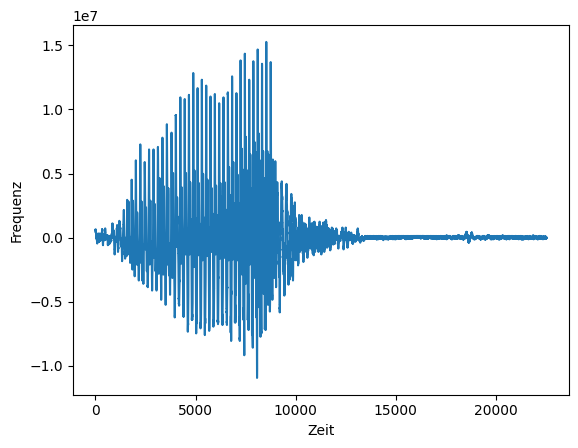

Detla t =  4.438920454545455e-05


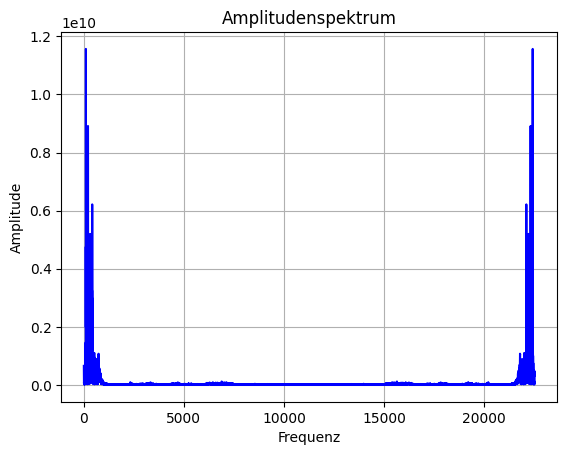

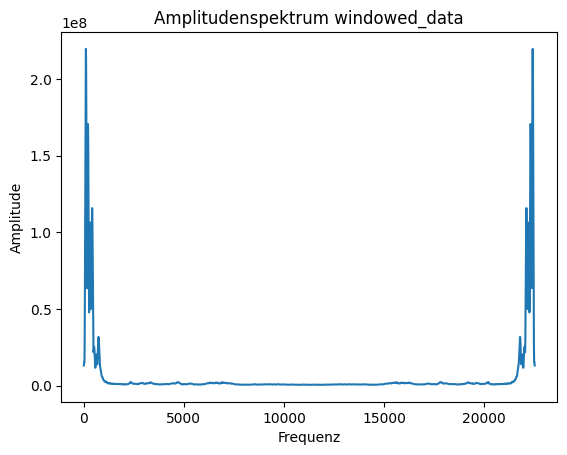

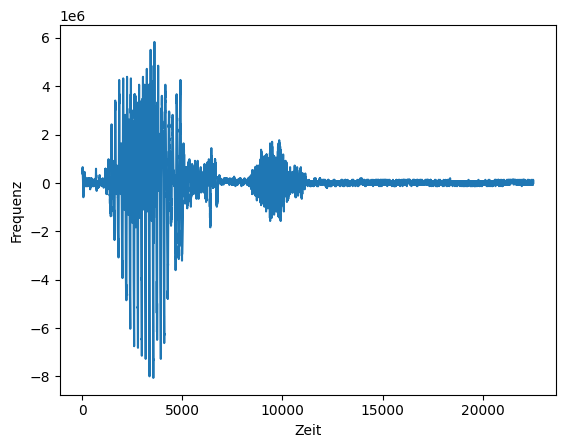

Detla t =  4.438920454545455e-05


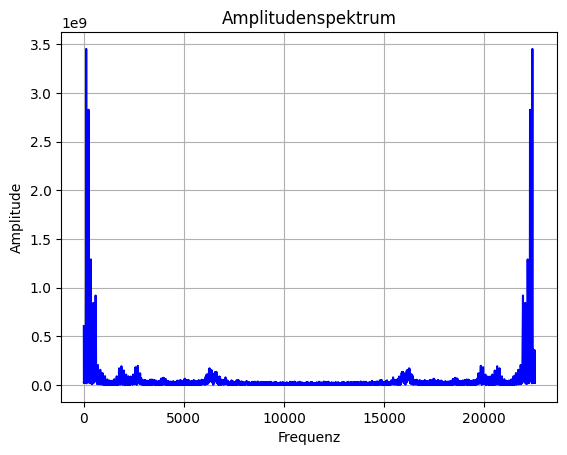

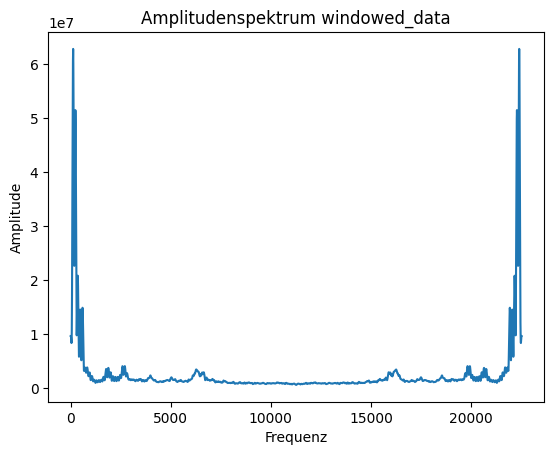

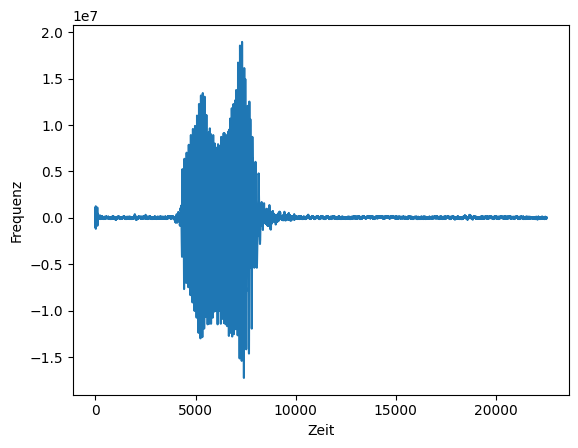

Detla t =  4.438920454545455e-05


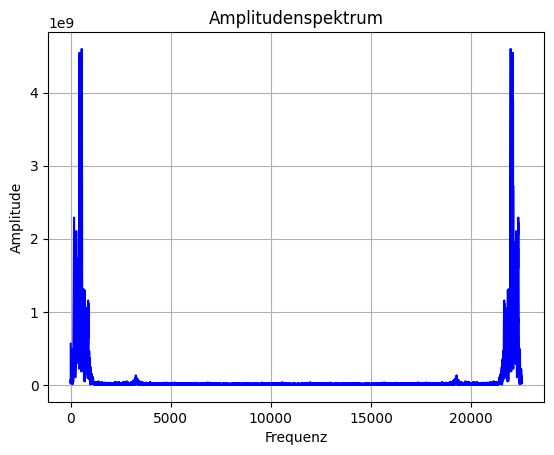

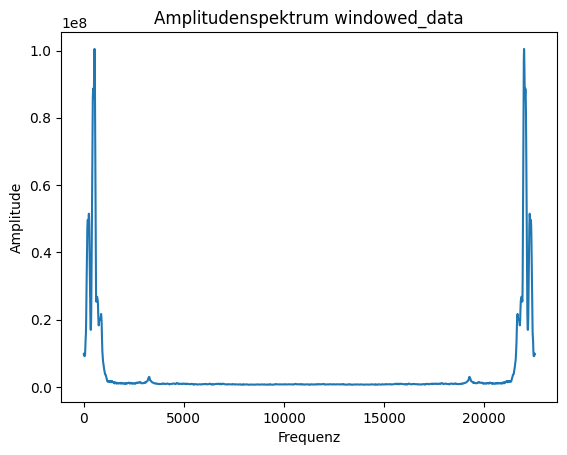

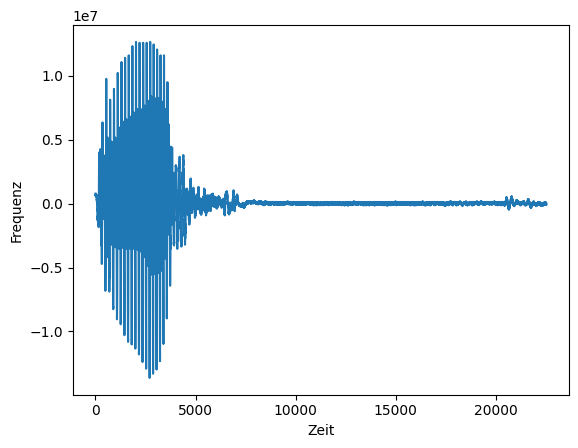

Detla t =  4.438920454545455e-05


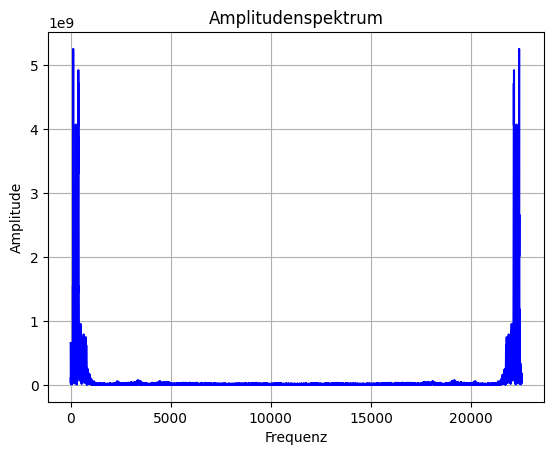

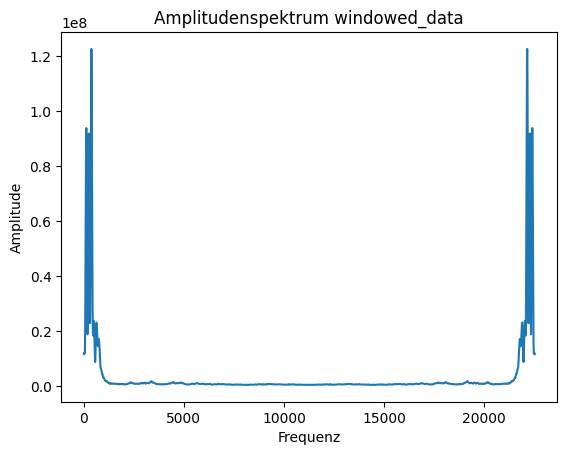

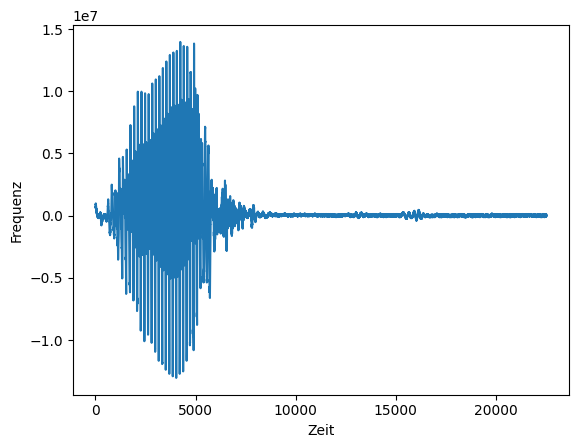

Detla t =  4.438920454545455e-05


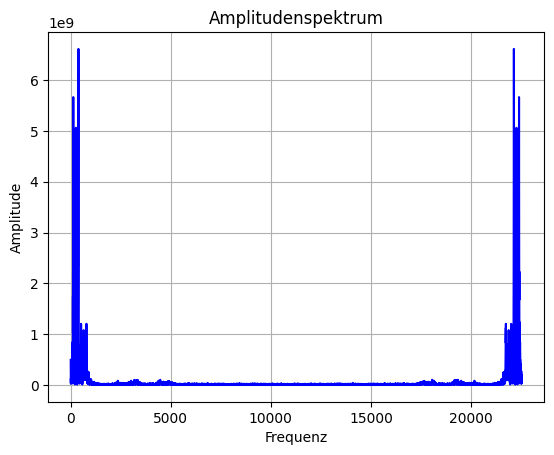

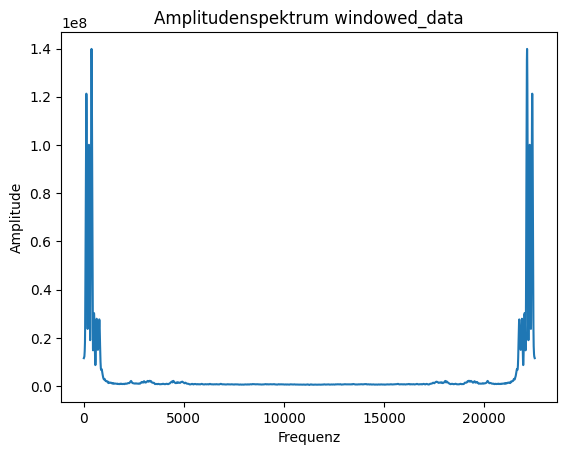

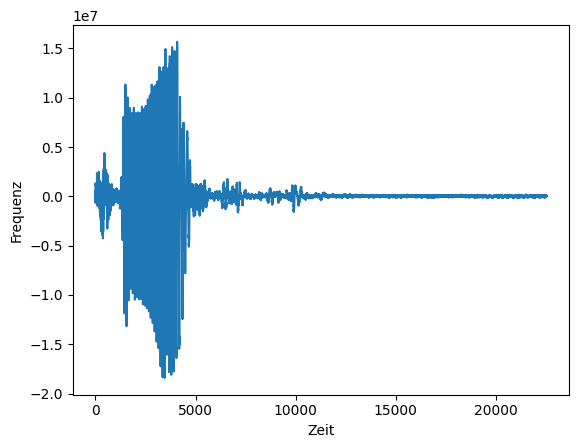

Detla t =  4.438920454545455e-05


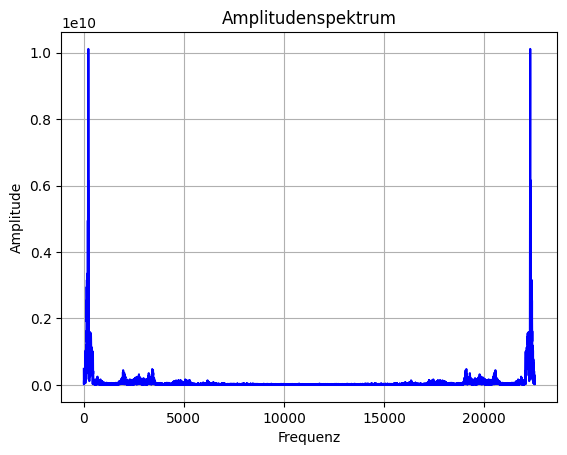

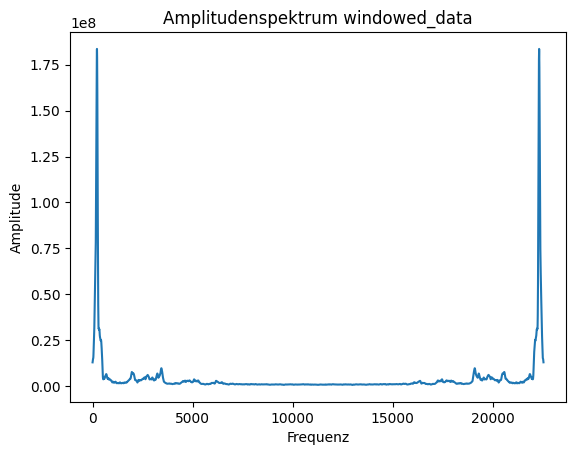

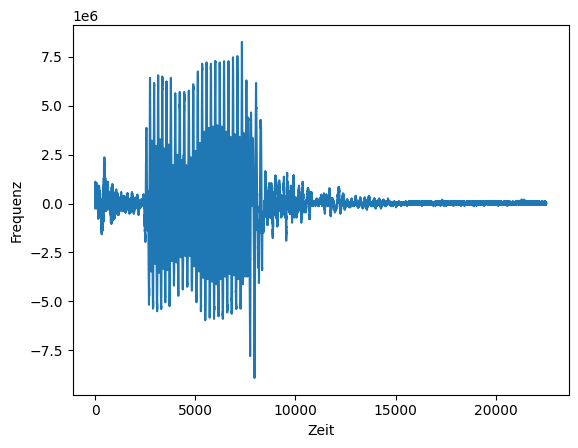

Detla t =  4.438920454545455e-05


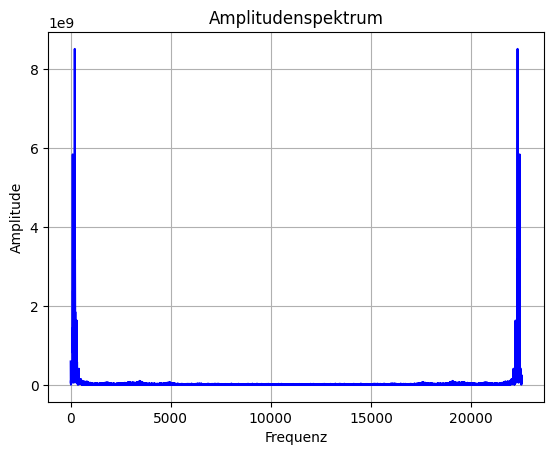

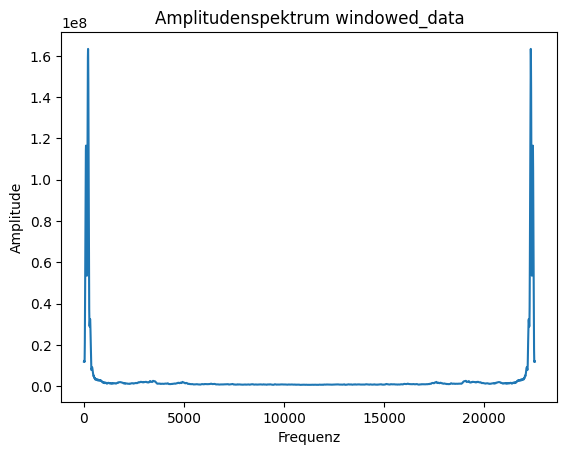

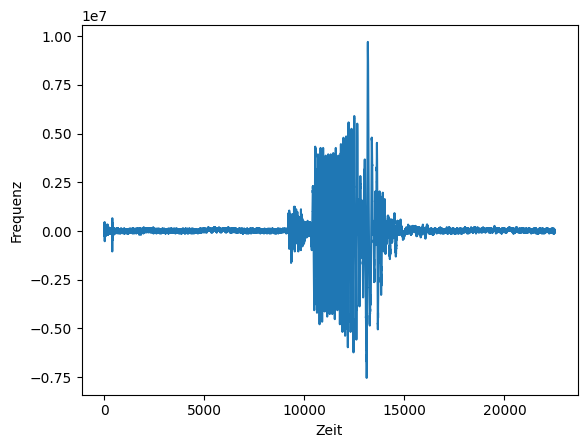

Detla t =  4.438920454545455e-05


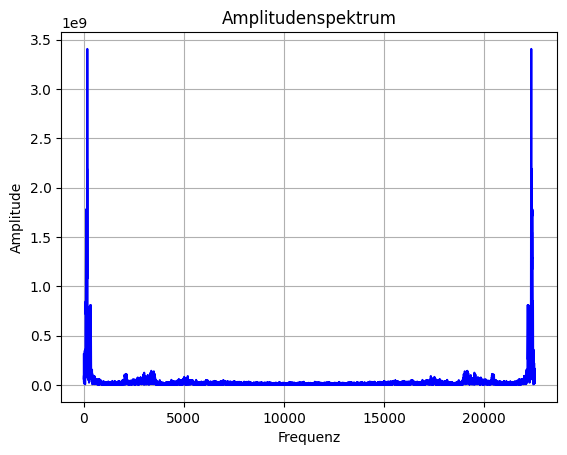

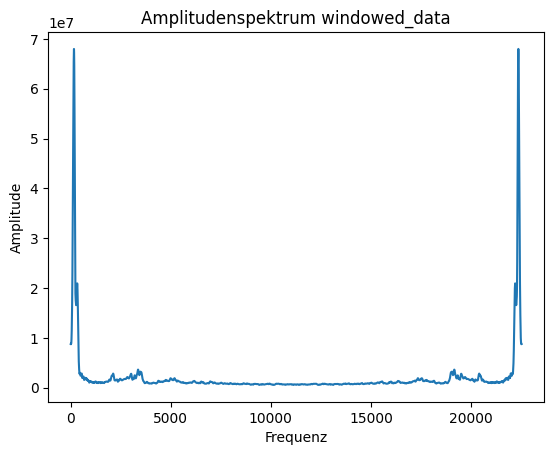

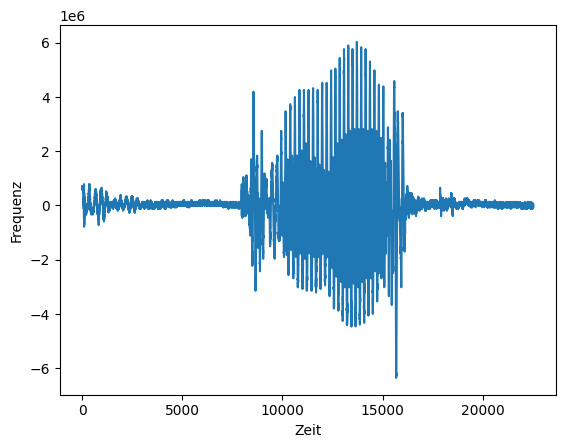

Detla t =  4.438920454545455e-05


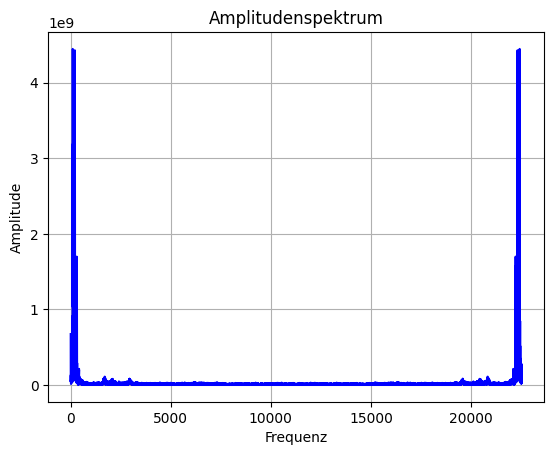

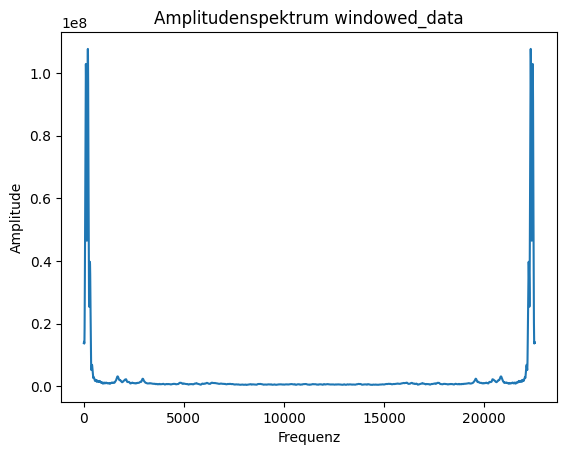

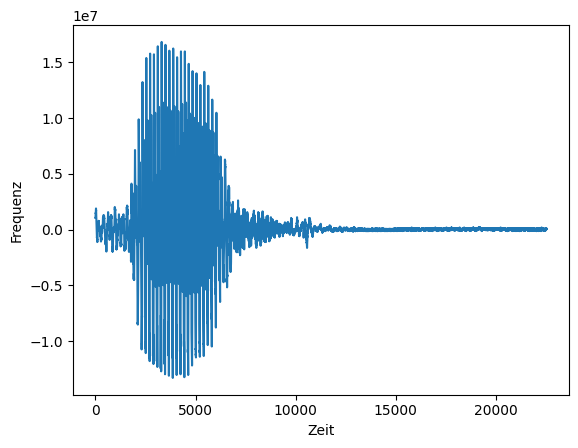

Detla t =  4.438920454545455e-05


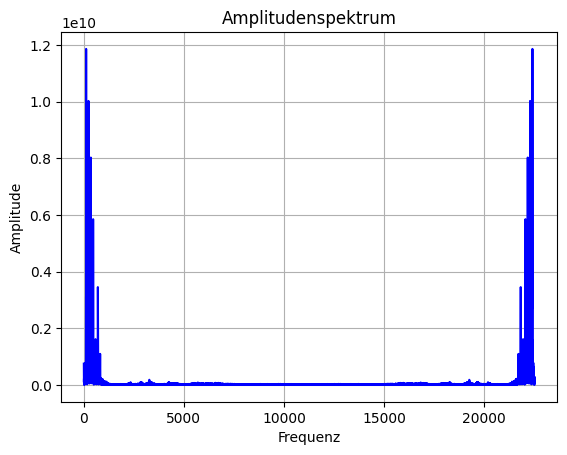

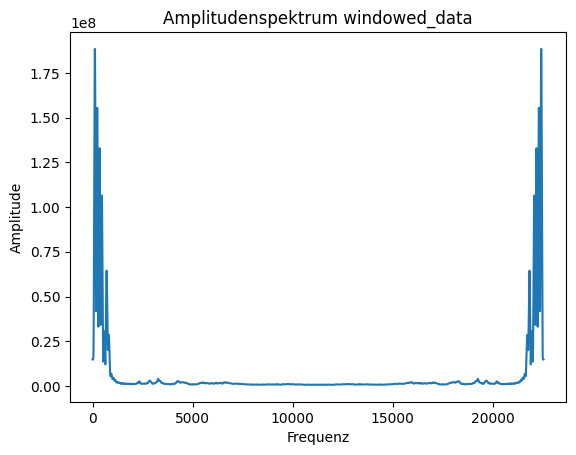

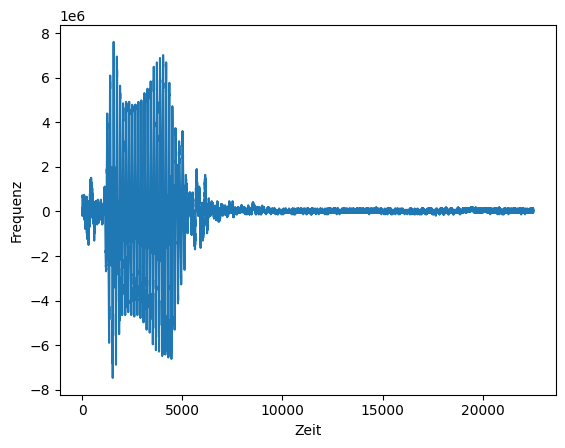

Detla t =  4.438920454545455e-05


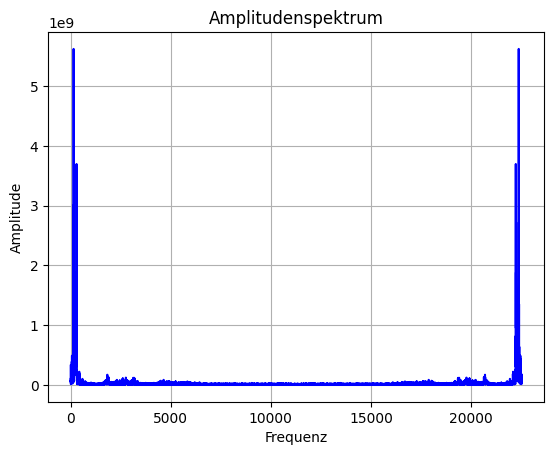

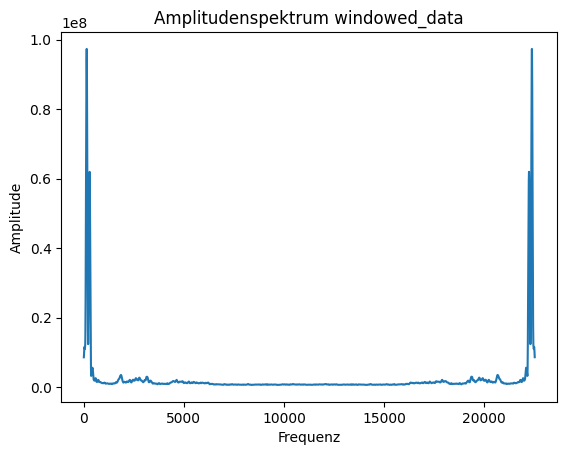

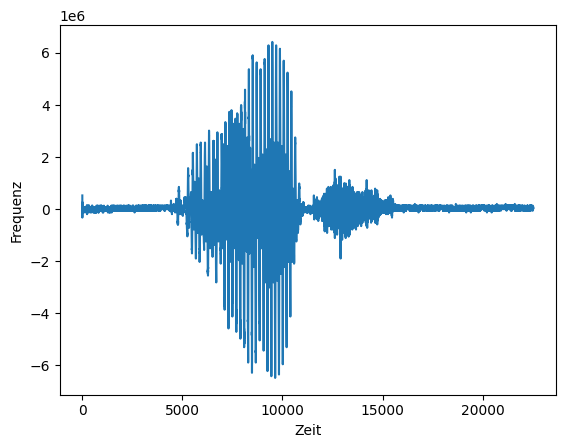

Detla t =  4.438920454545455e-05


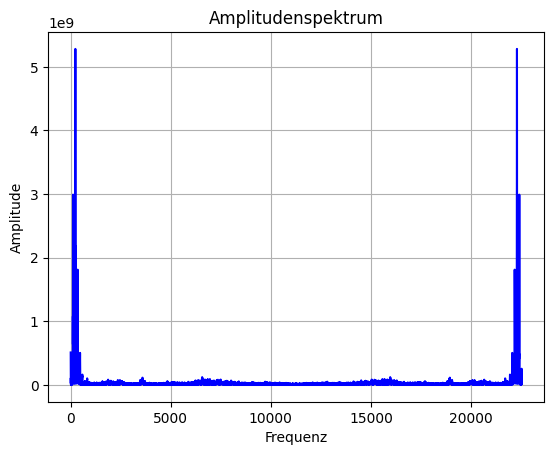

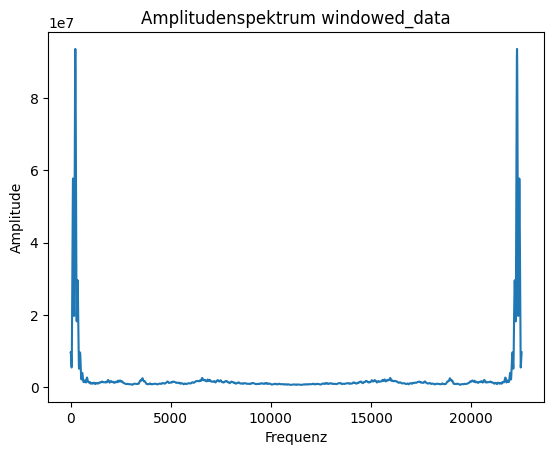

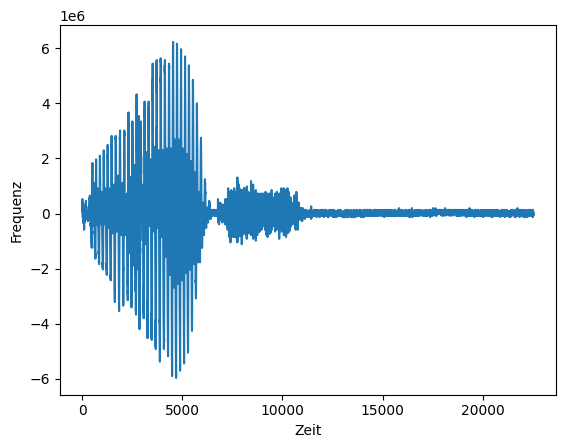

Detla t =  4.438920454545455e-05


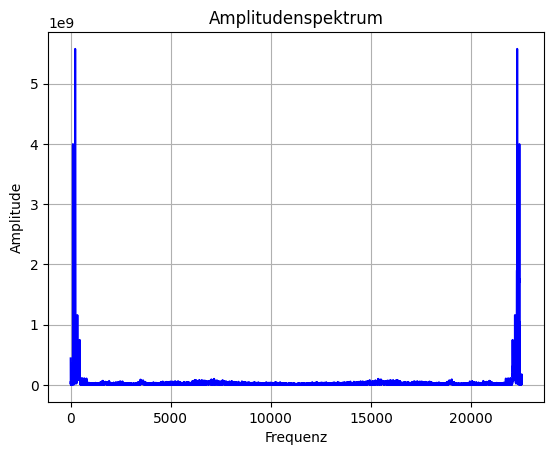

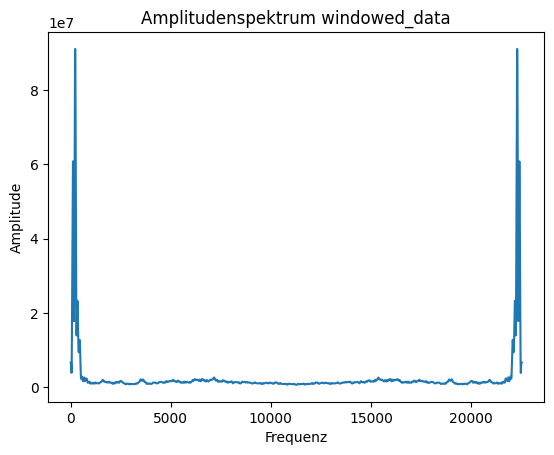

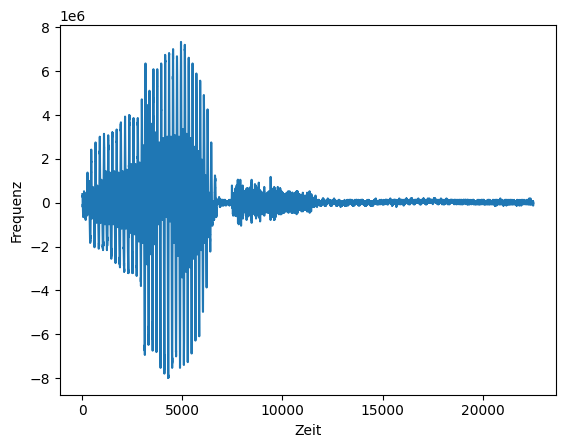

Detla t =  4.438920454545455e-05


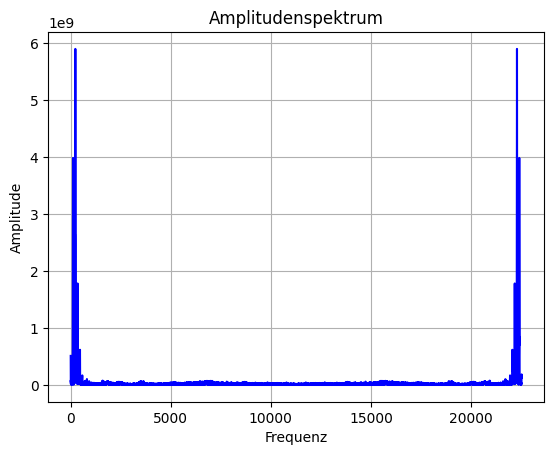

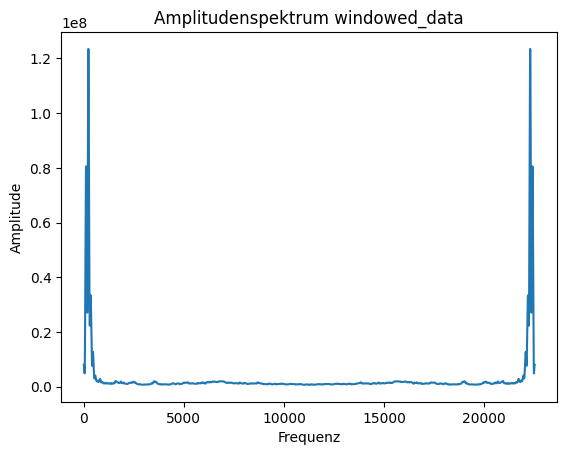

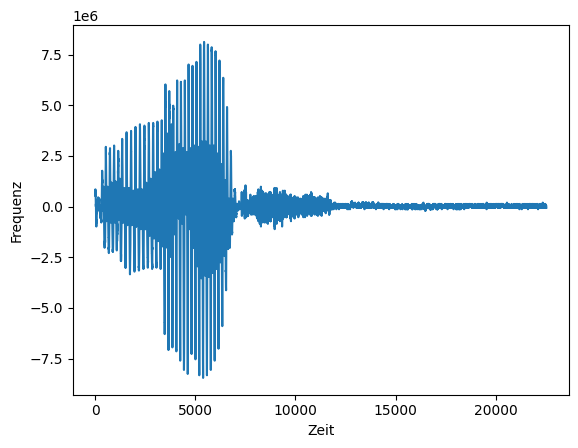

Detla t =  4.438920454545455e-05


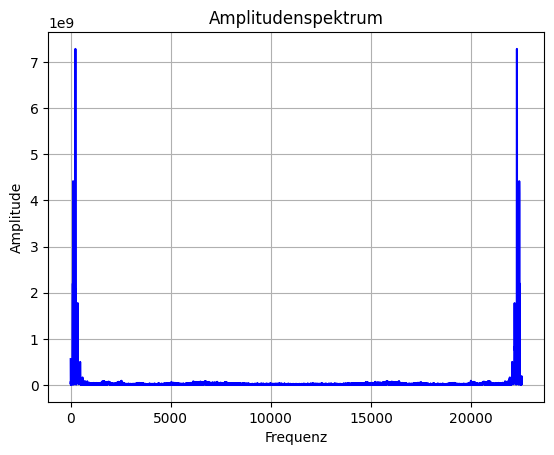

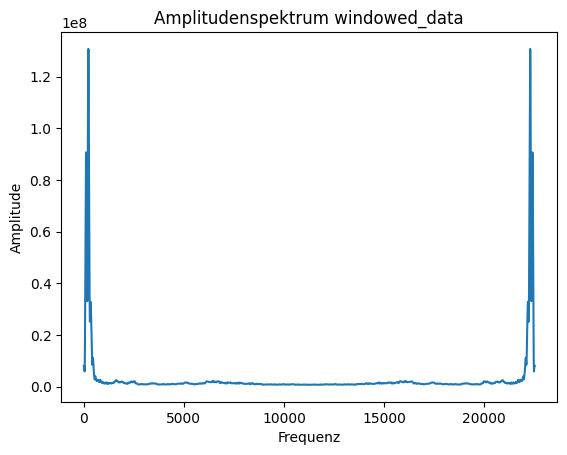

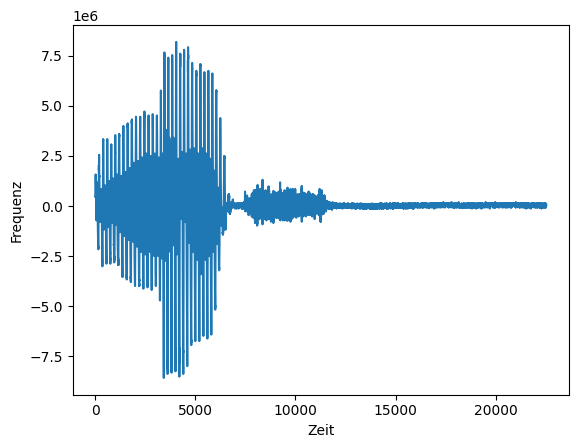

Detla t =  4.438920454545455e-05


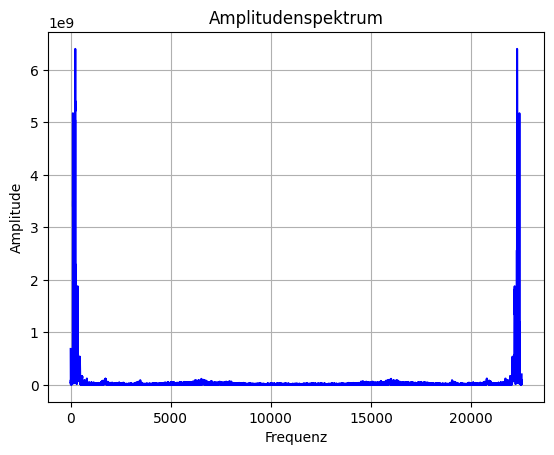

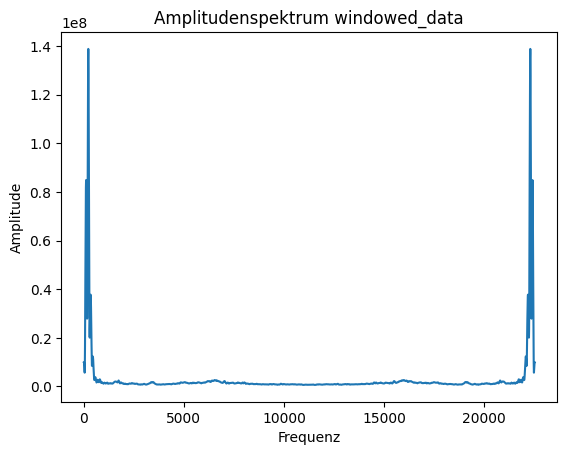

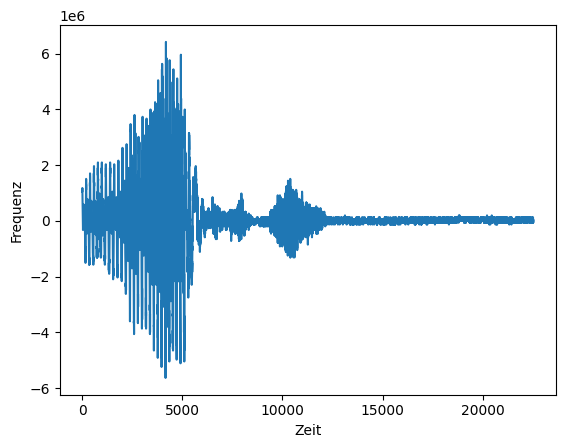

Detla t =  4.438920454545455e-05


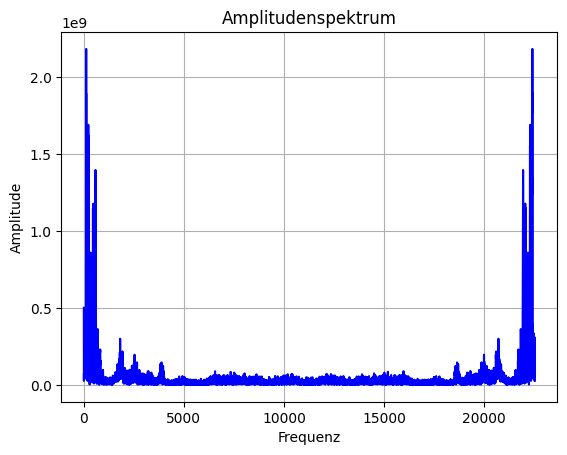

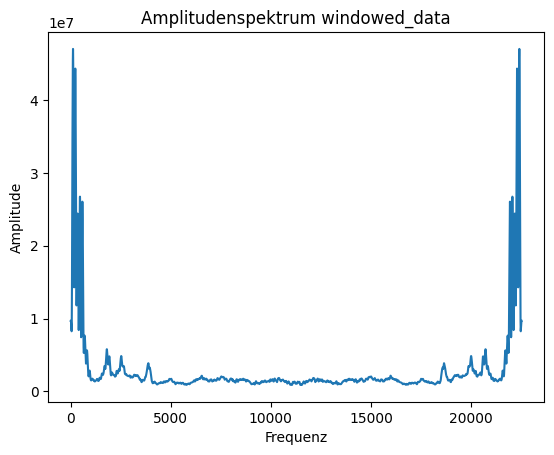

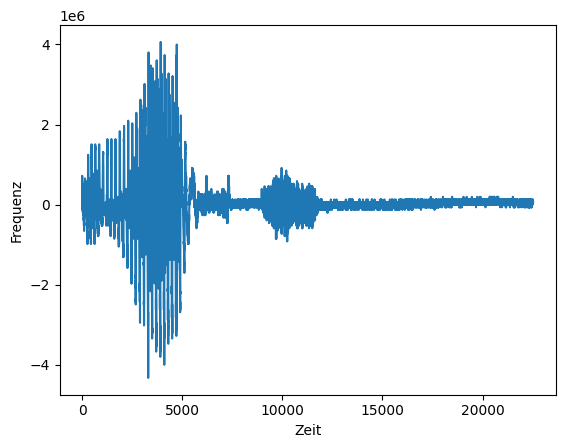

Detla t =  4.438920454545455e-05


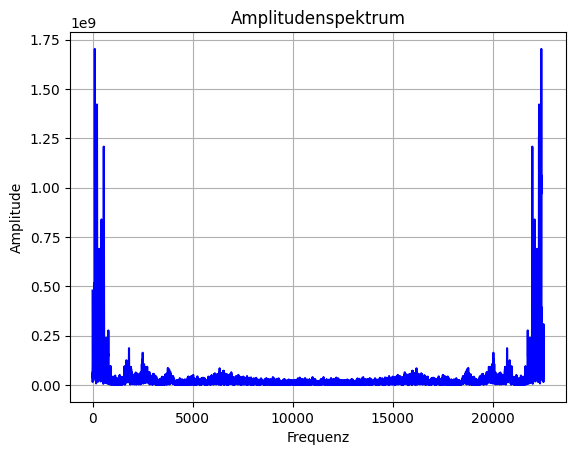

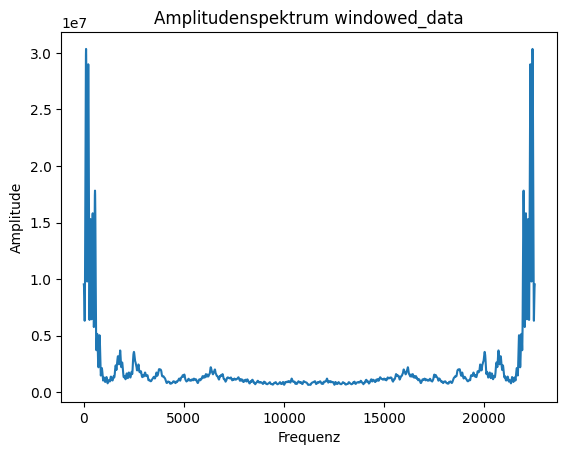

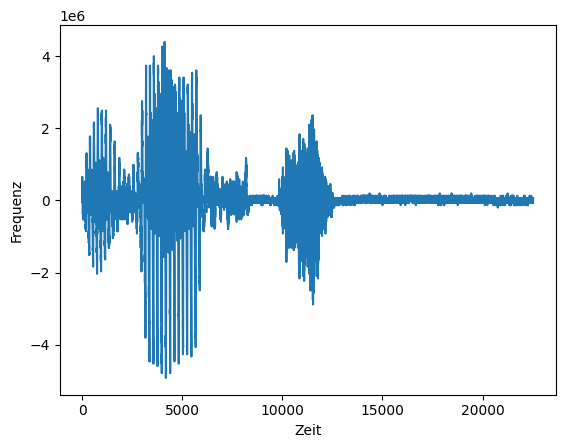

Detla t =  4.438920454545455e-05


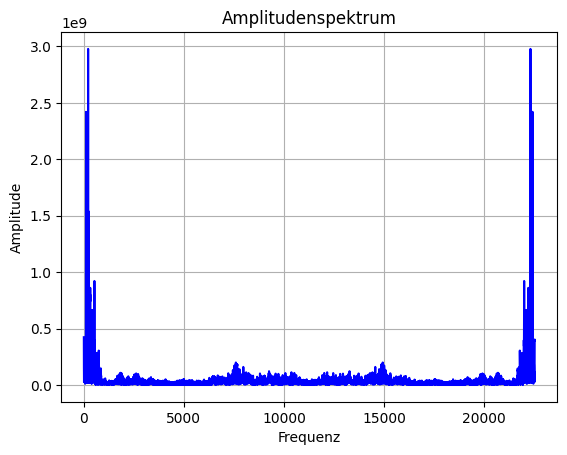

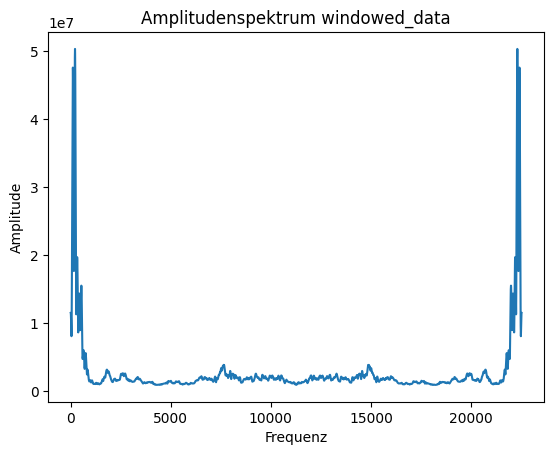

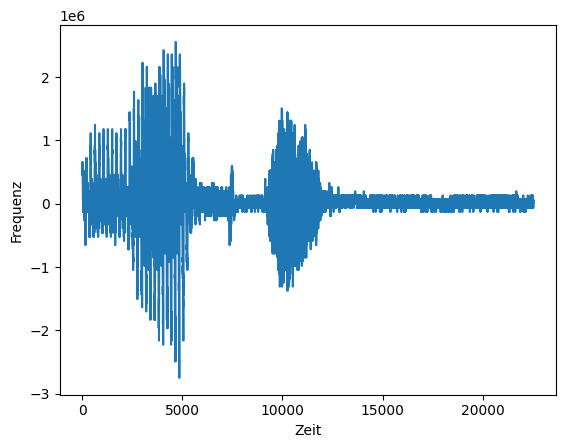

Detla t =  4.438920454545455e-05


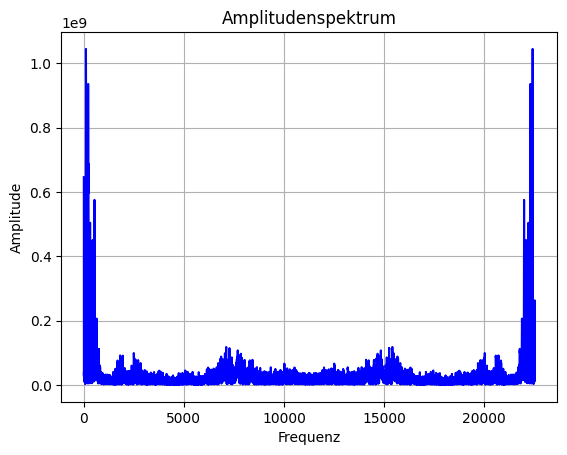

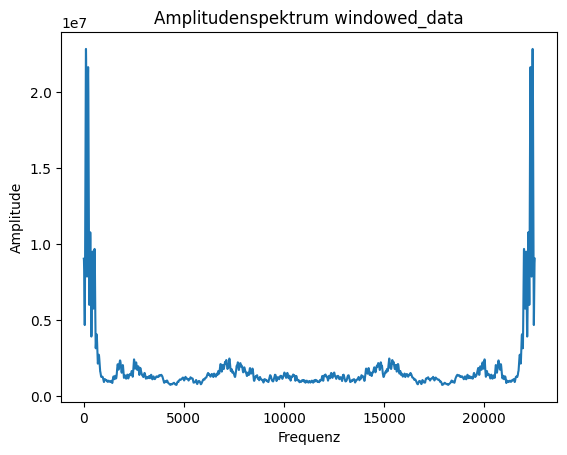

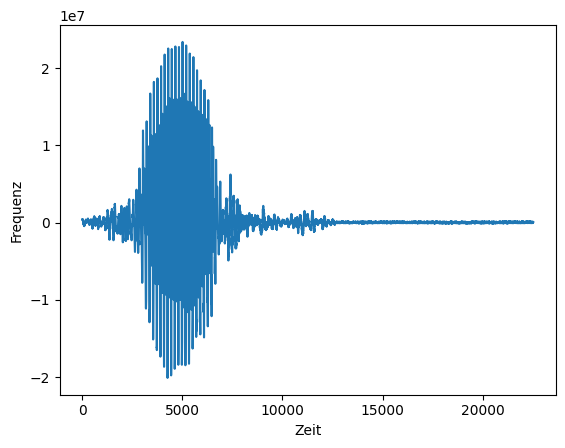

Detla t =  4.438920454545455e-05


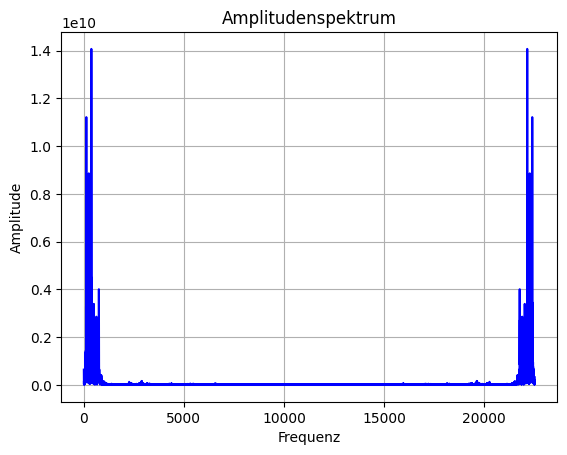

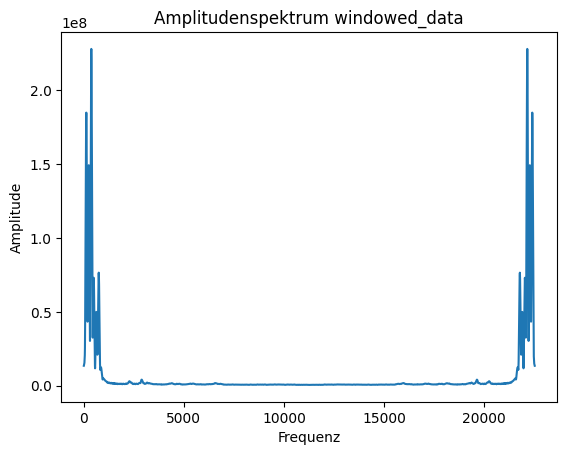

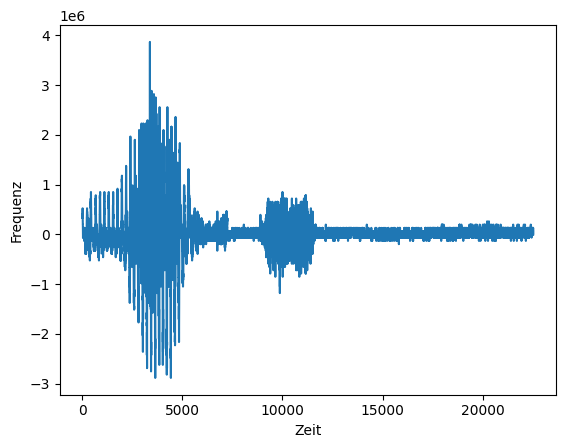

Detla t =  4.438920454545455e-05


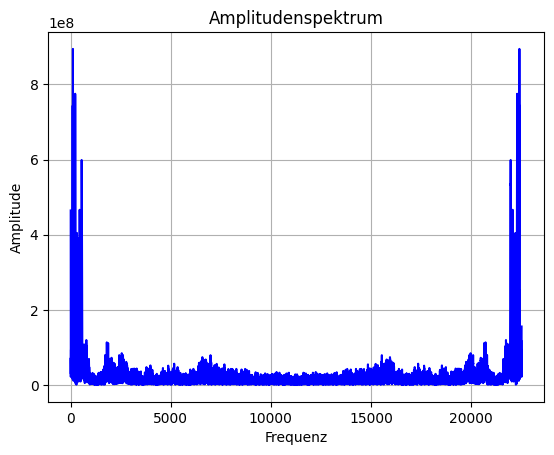

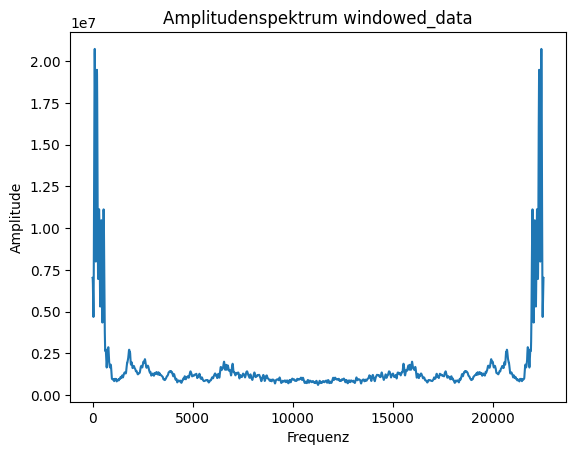

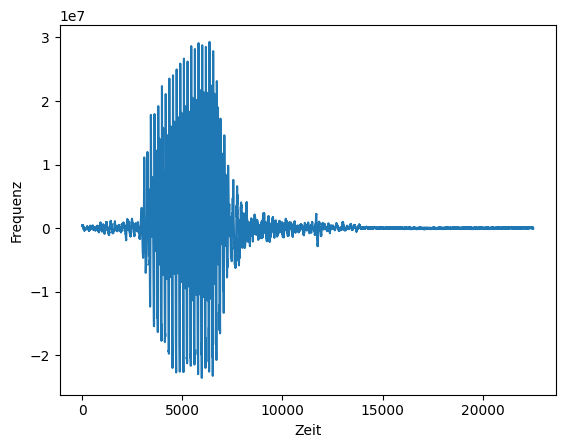

Detla t =  4.438920454545455e-05


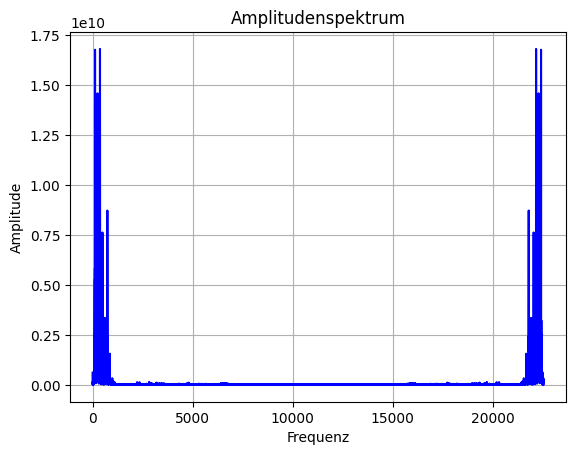

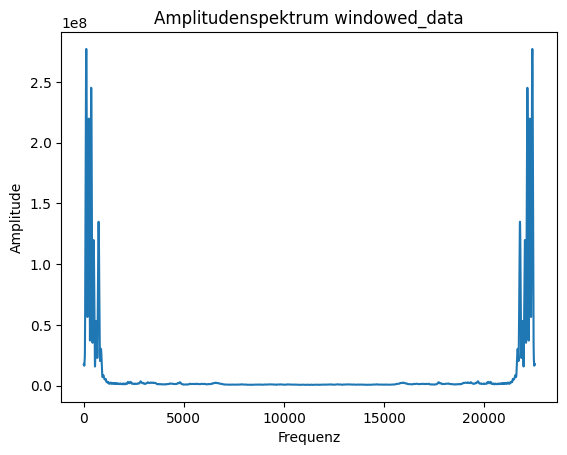

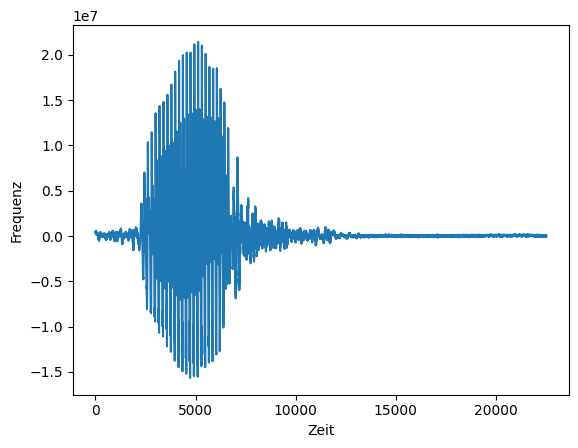

Detla t =  4.438920454545455e-05


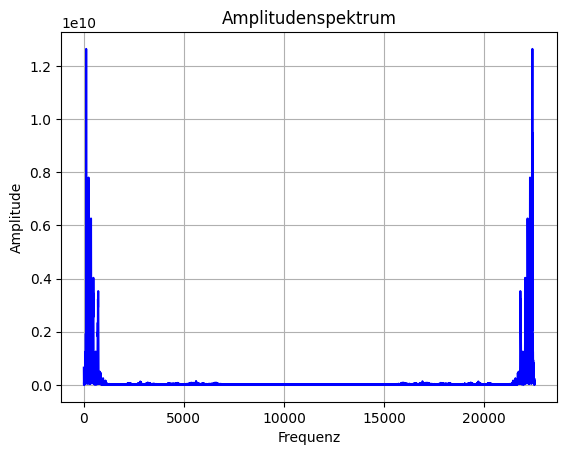

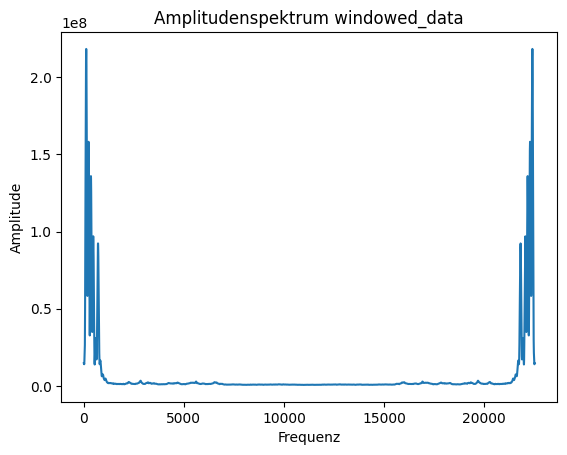

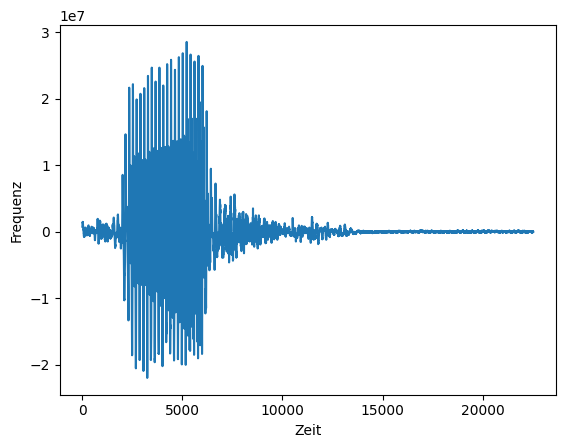

Detla t =  4.438920454545455e-05


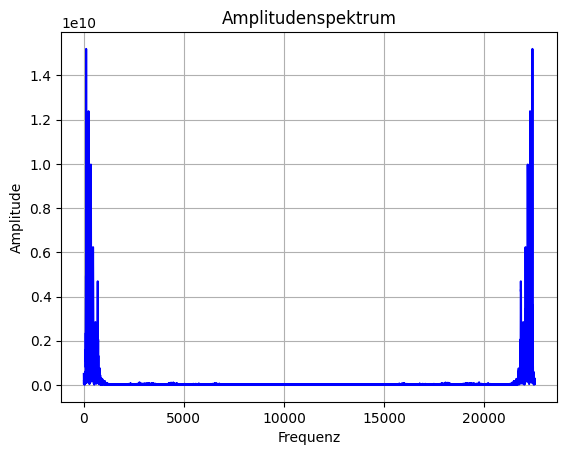

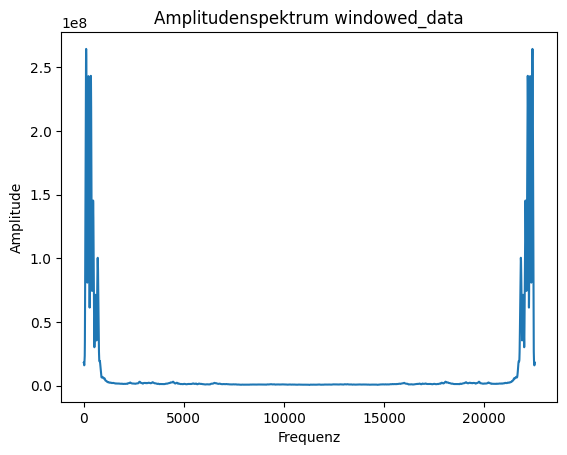

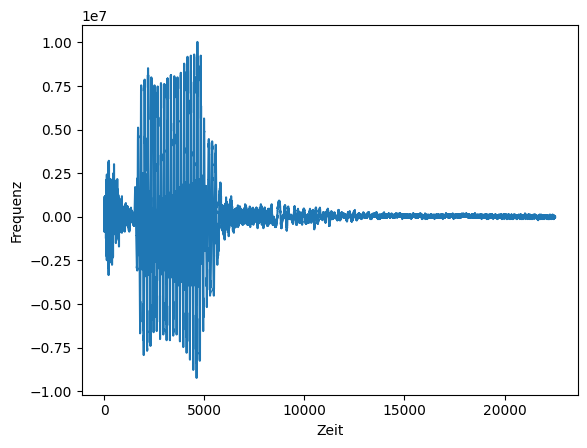

Detla t =  4.438920454545455e-05


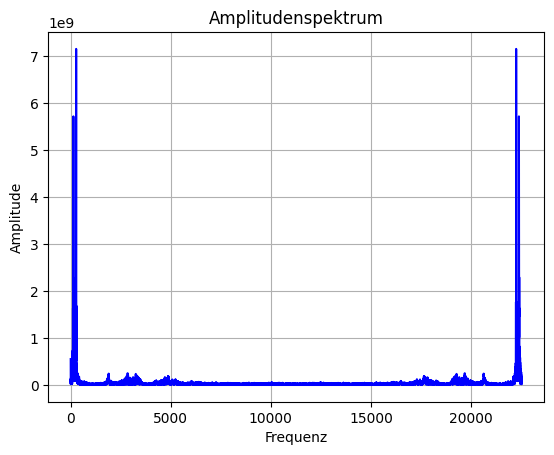

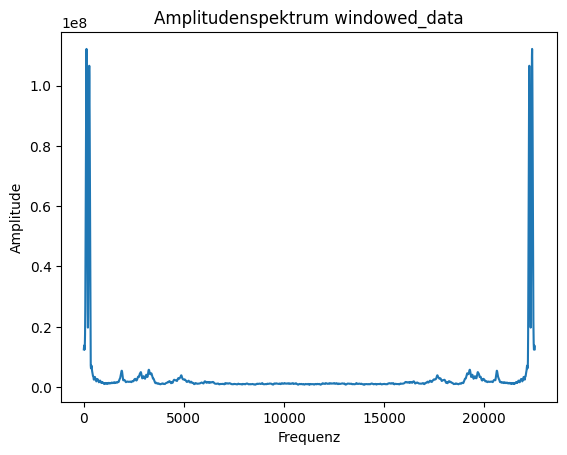

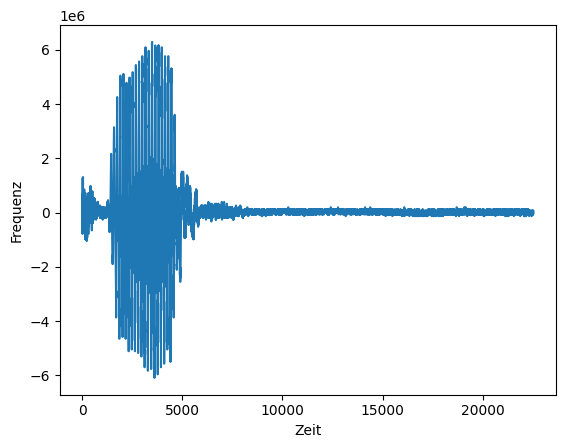

Detla t =  4.438920454545455e-05


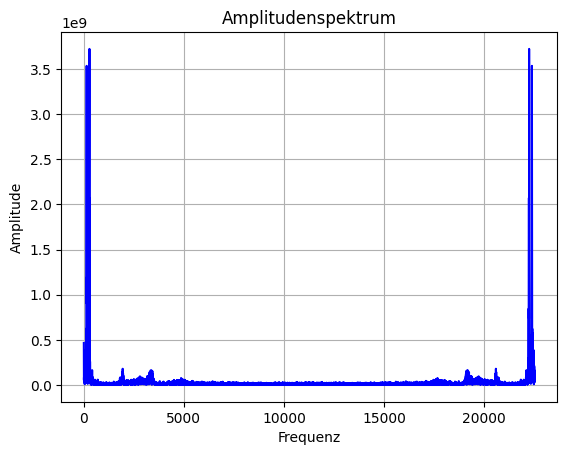

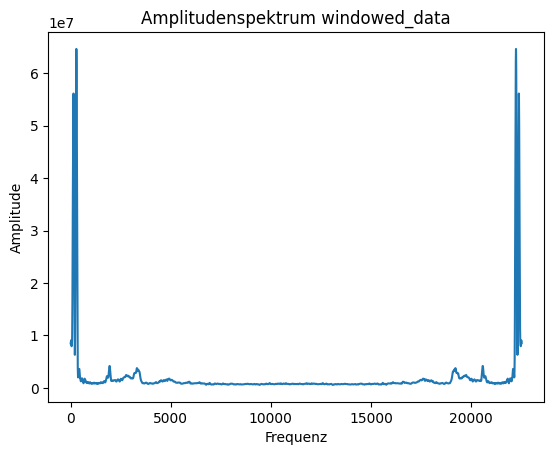

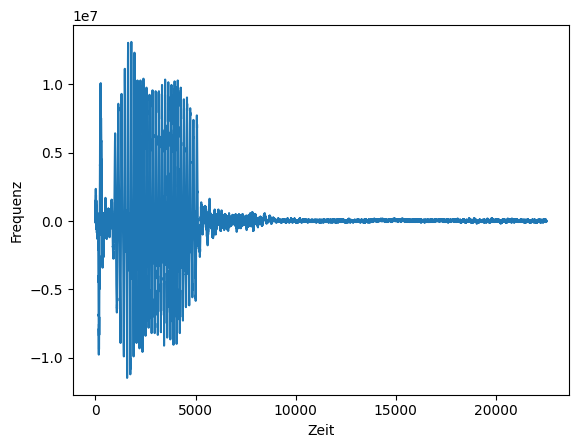

Detla t =  4.438920454545455e-05


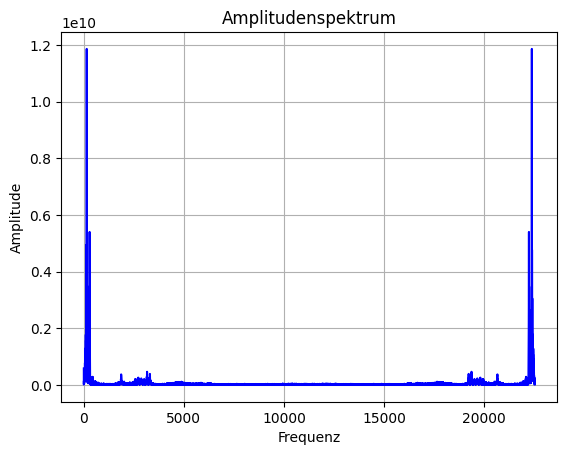

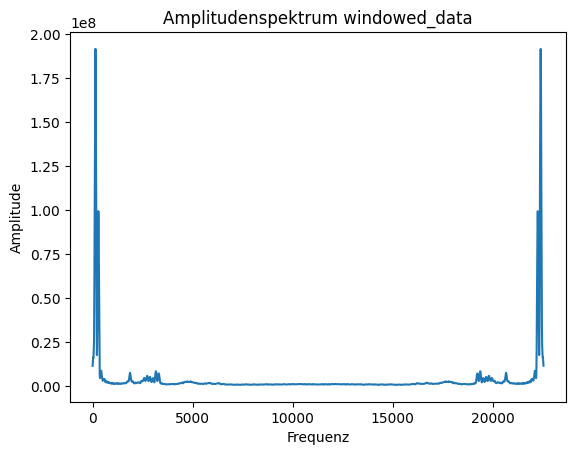

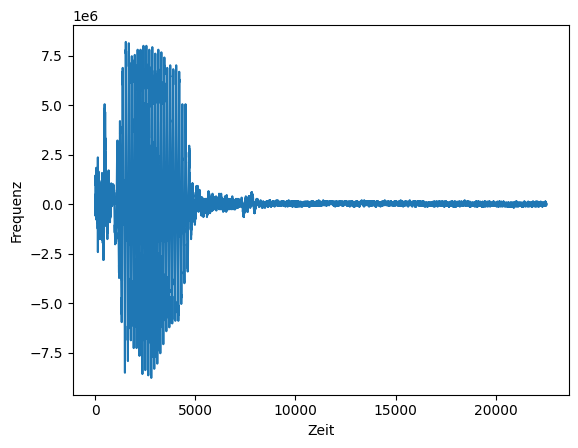

Detla t =  4.438920454545455e-05


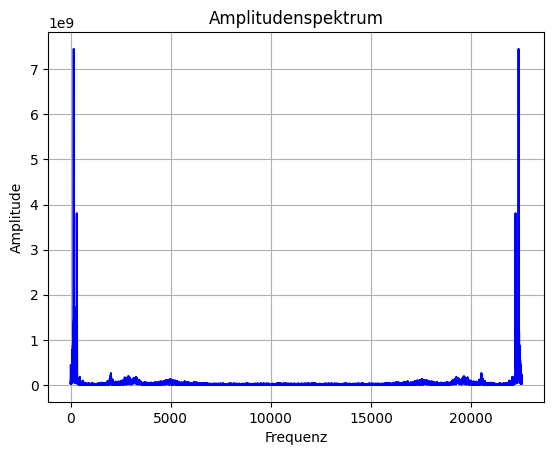

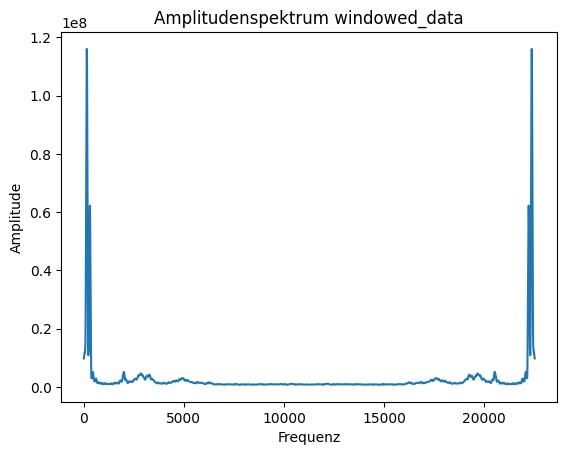

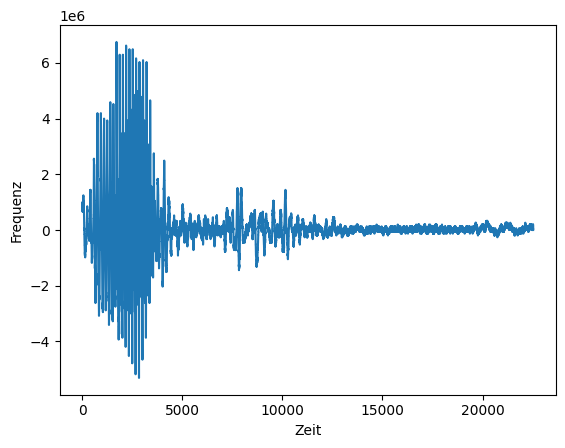

Detla t =  4.438920454545455e-05


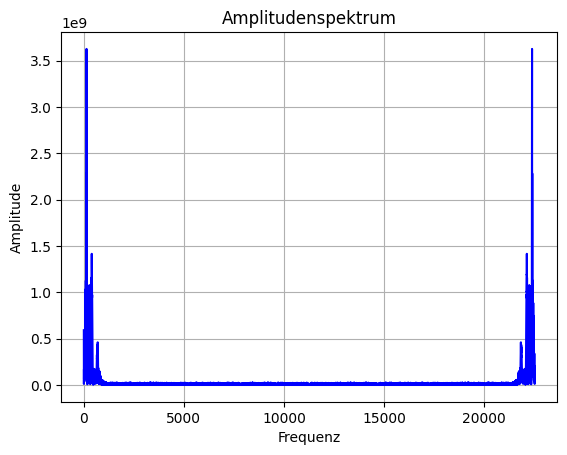

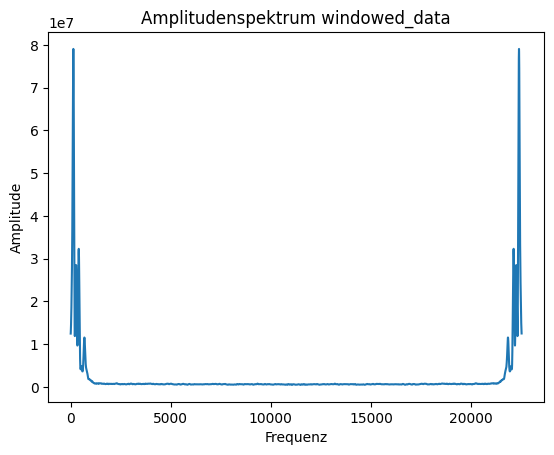

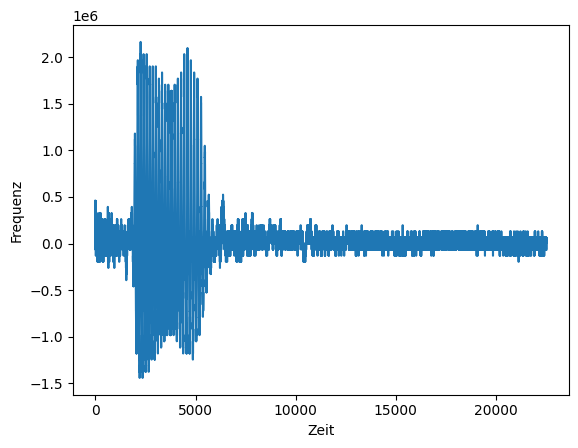

Detla t =  4.438920454545455e-05


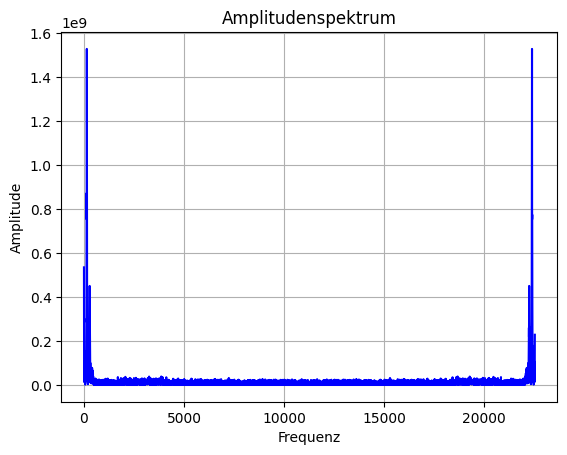

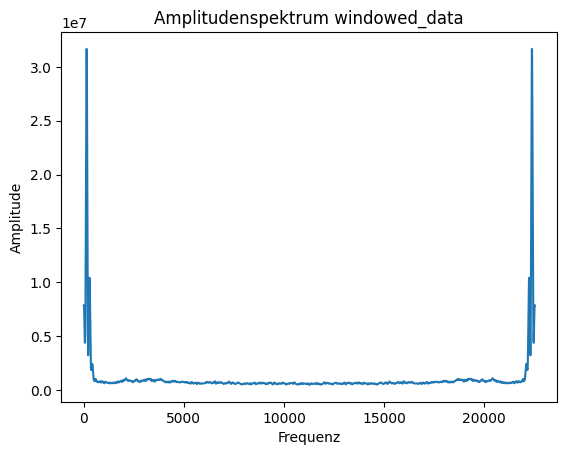

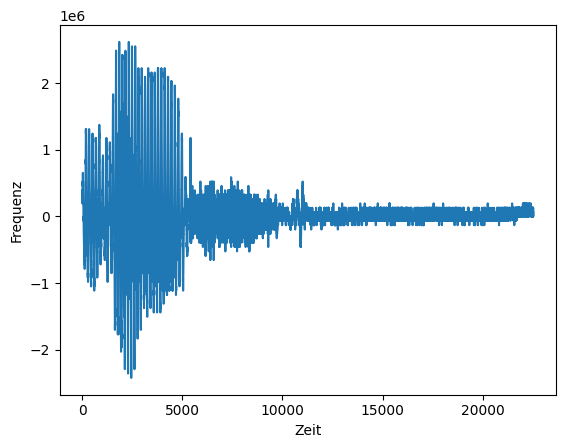

Detla t =  4.438920454545455e-05


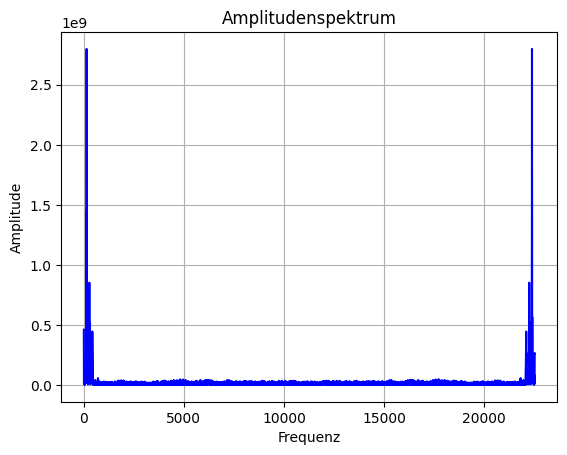

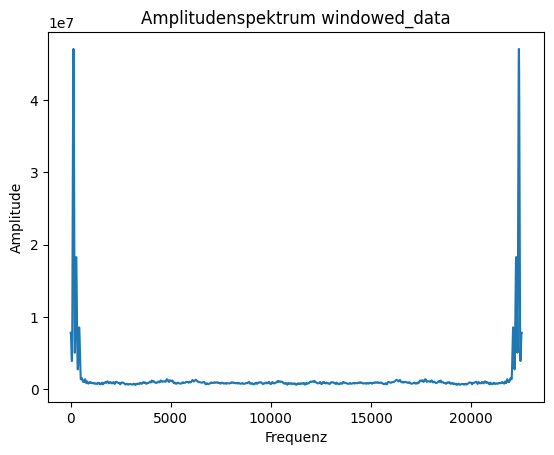

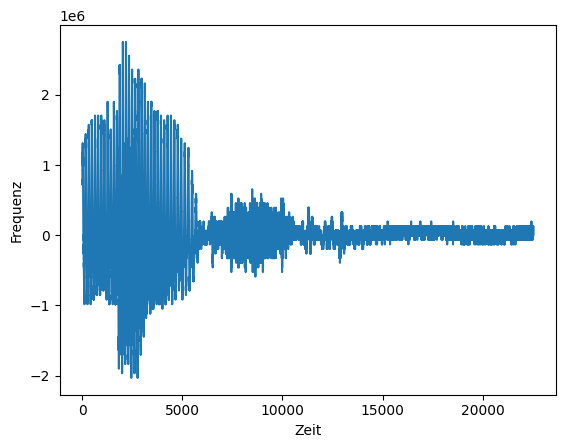

Detla t =  4.438920454545455e-05


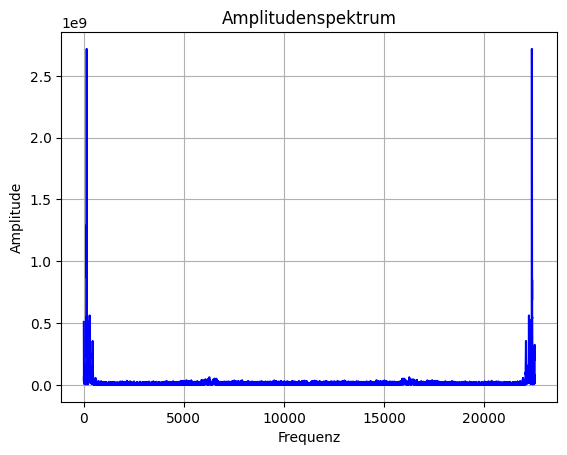

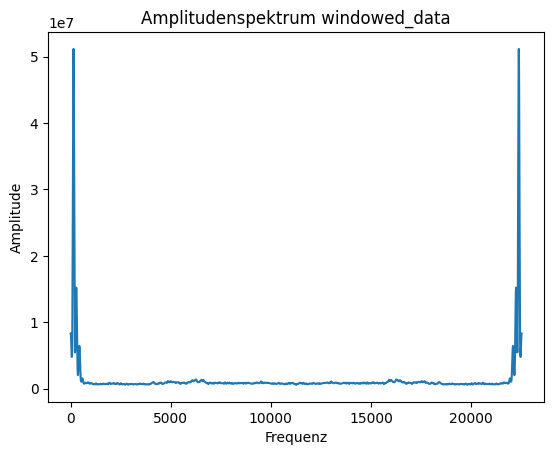

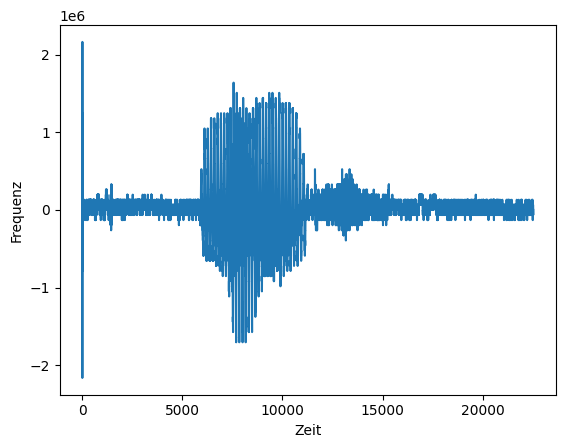

Detla t =  4.438920454545455e-05


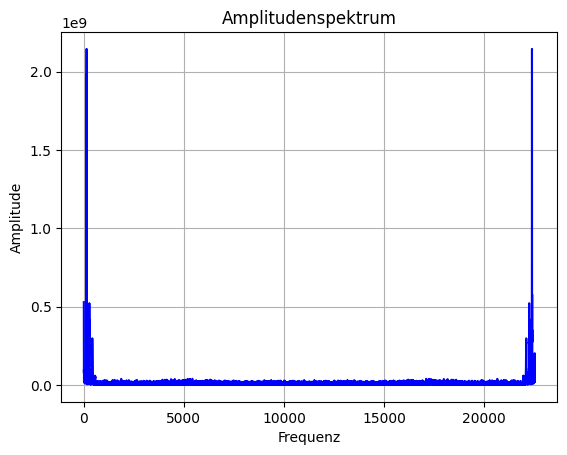

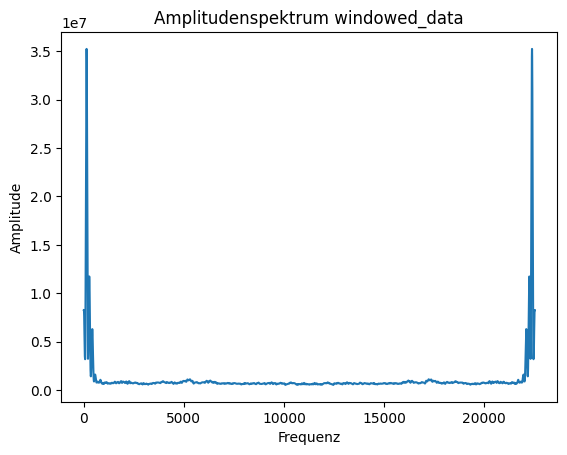

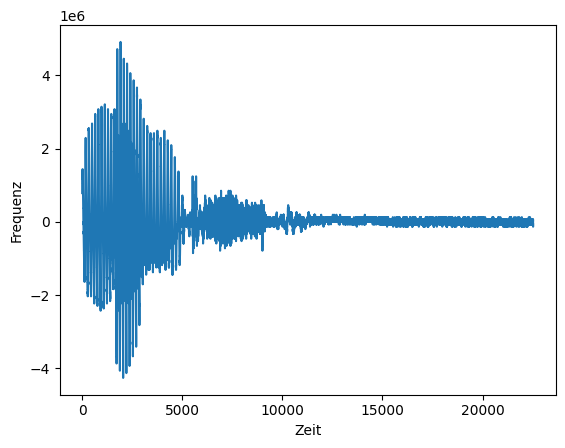

Detla t =  4.438920454545455e-05


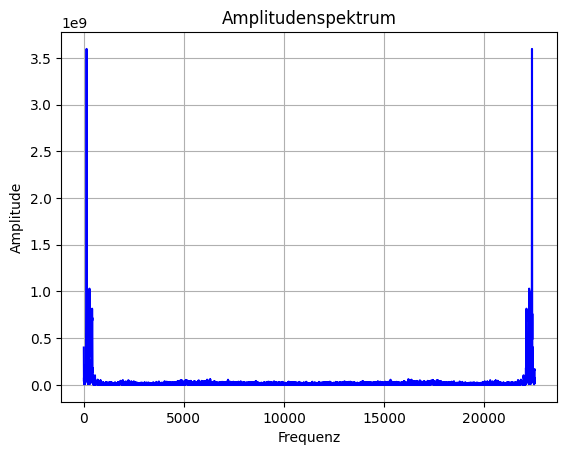

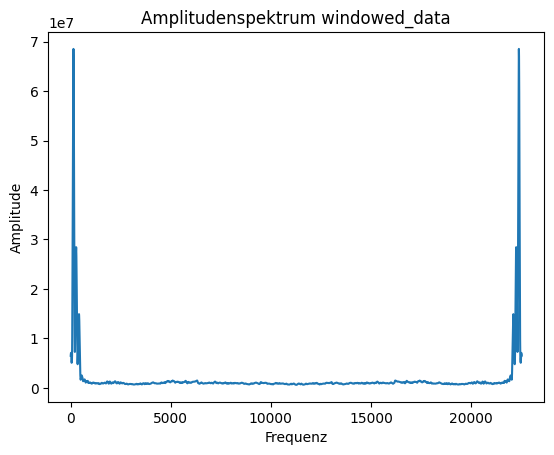

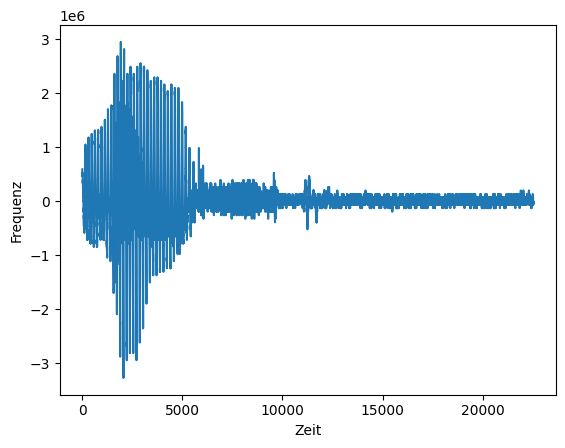

Detla t =  4.438920454545455e-05


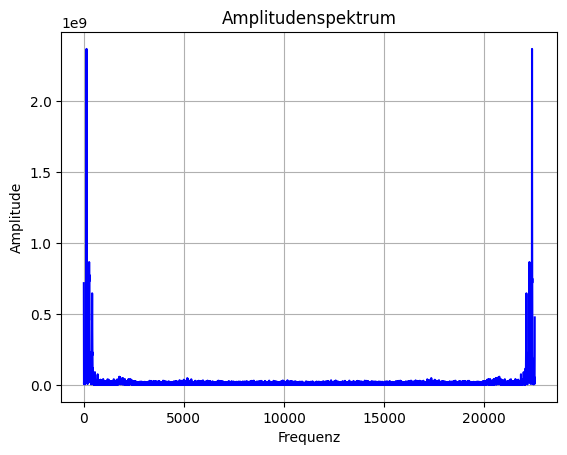

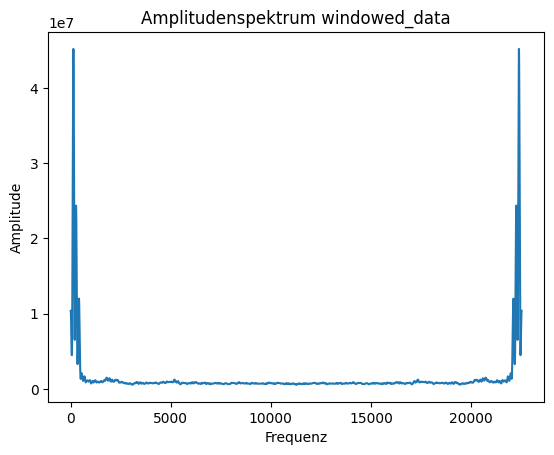

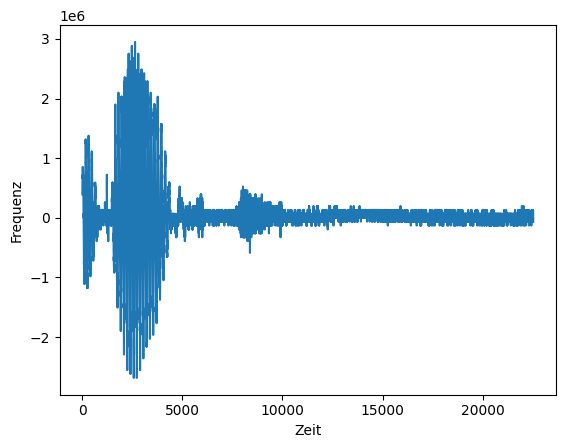

Detla t =  4.438920454545455e-05


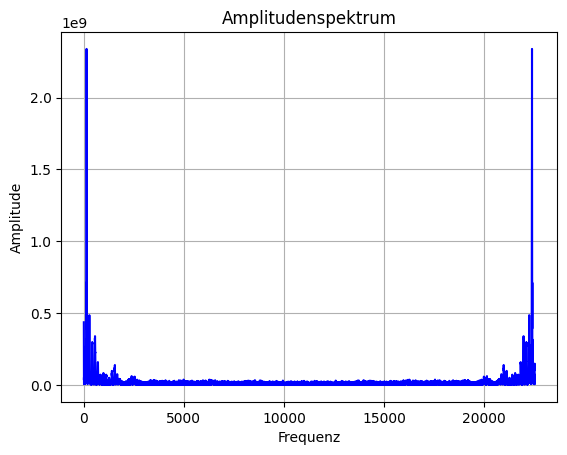

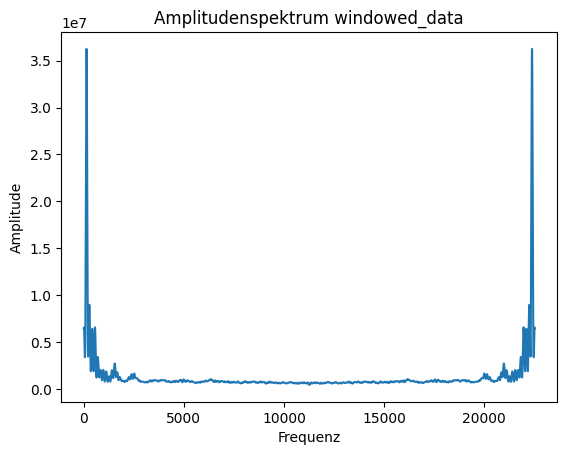

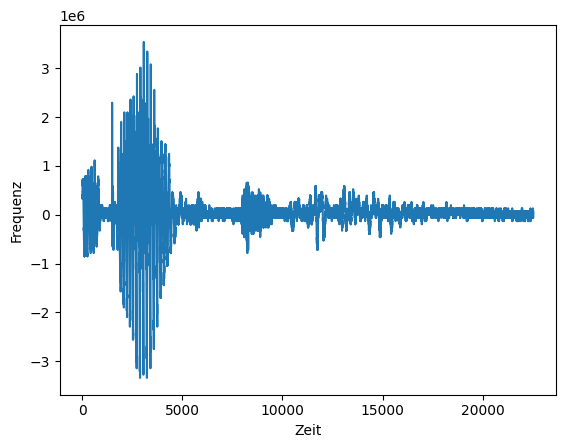

Detla t =  4.438920454545455e-05


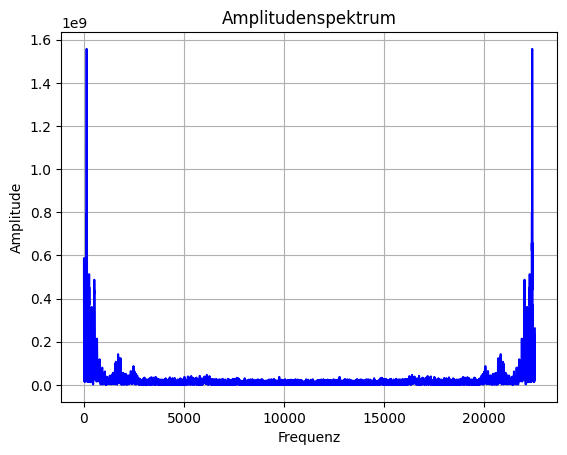

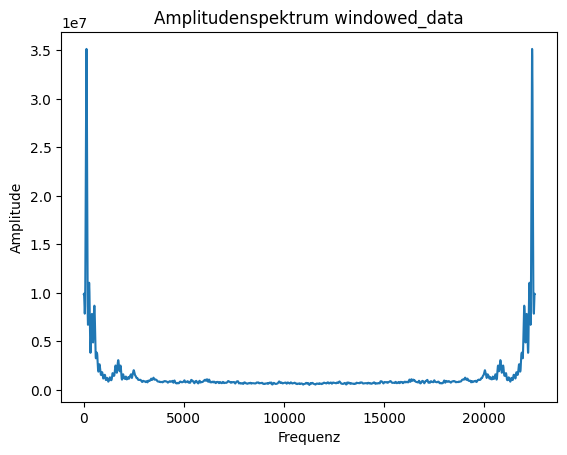

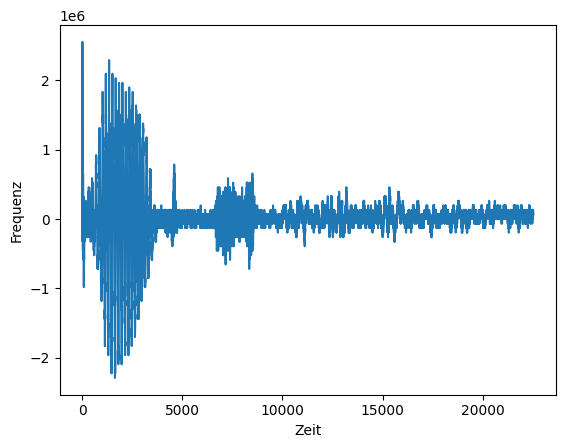

Detla t =  4.438920454545455e-05


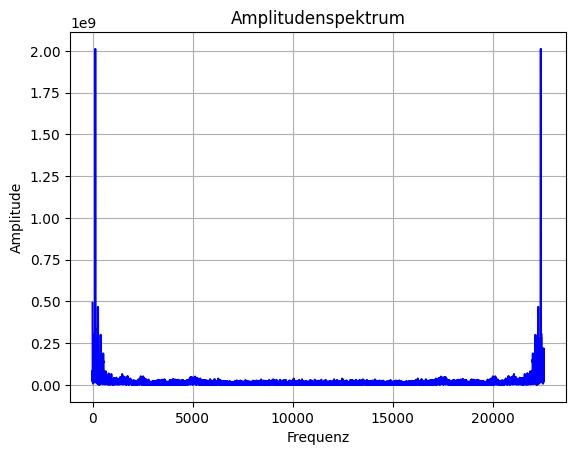

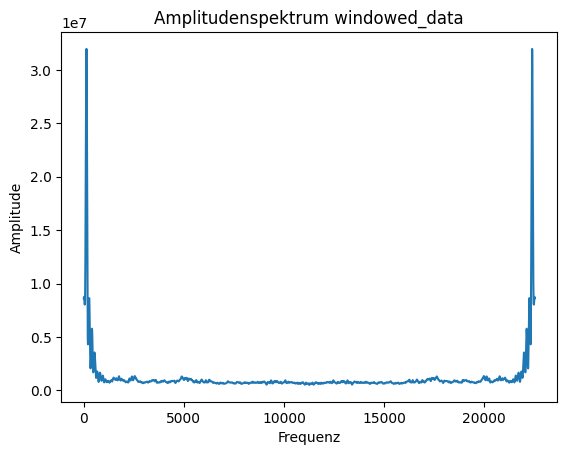

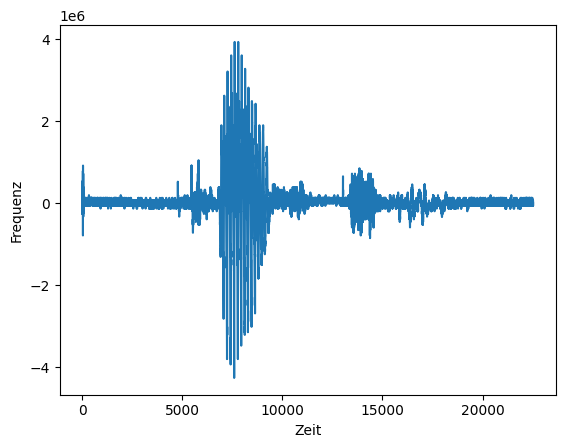

Detla t =  4.438920454545455e-05


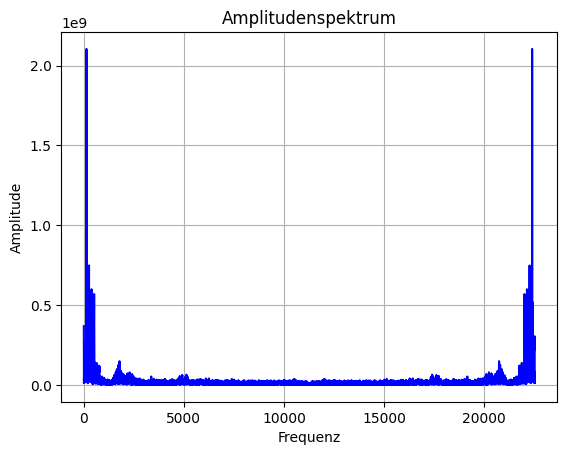

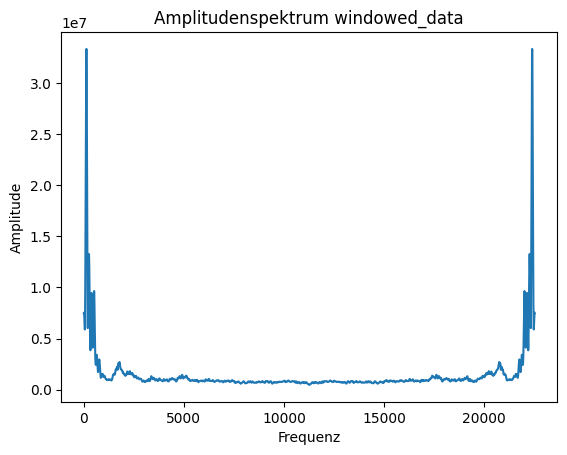

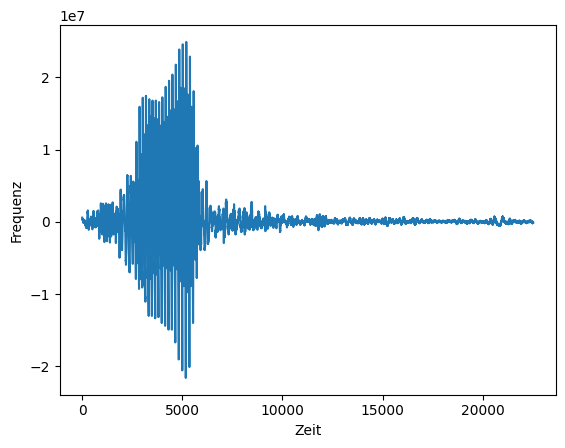

Detla t =  4.438920454545455e-05


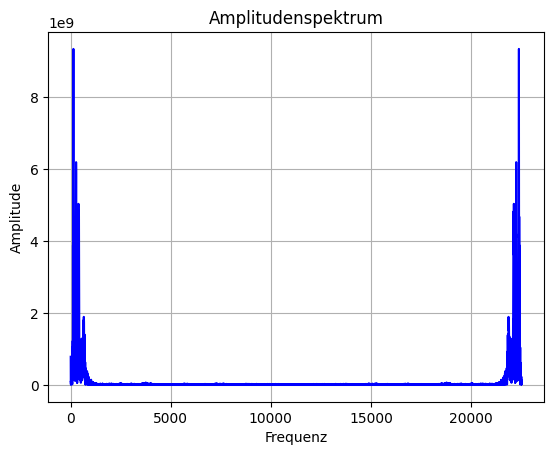

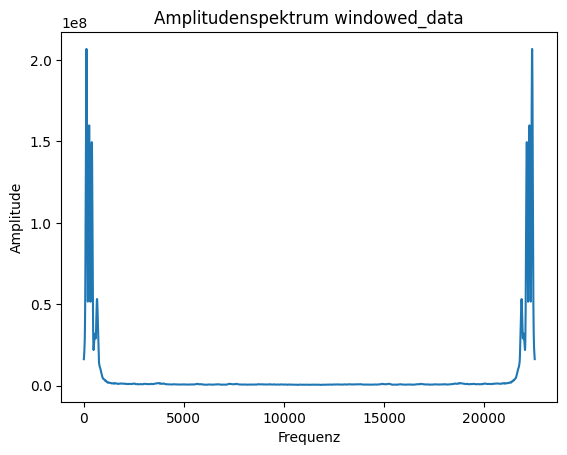

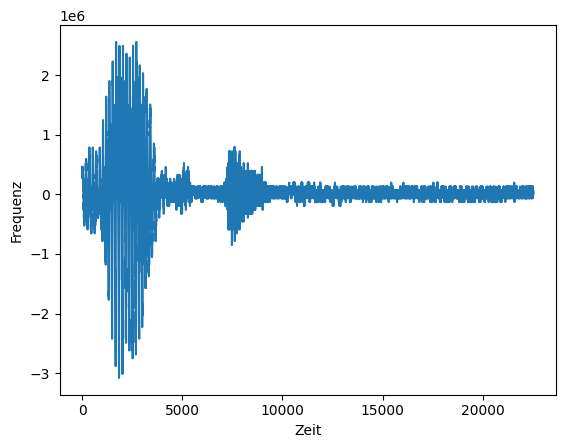

Detla t =  4.438920454545455e-05


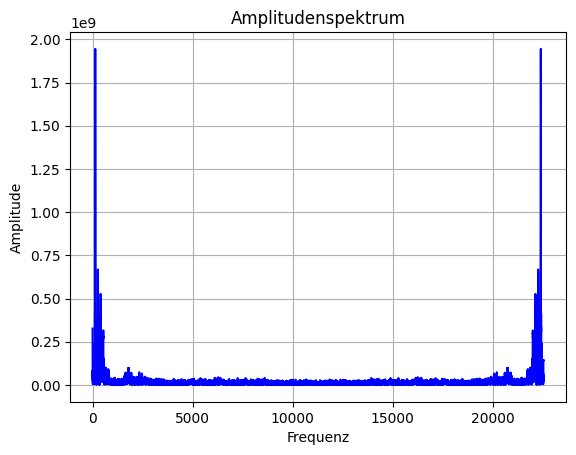

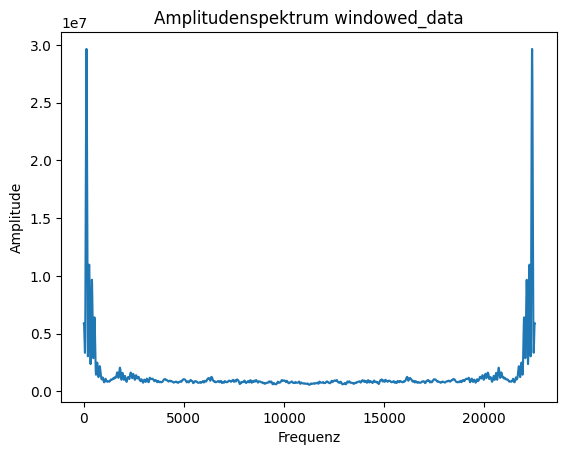

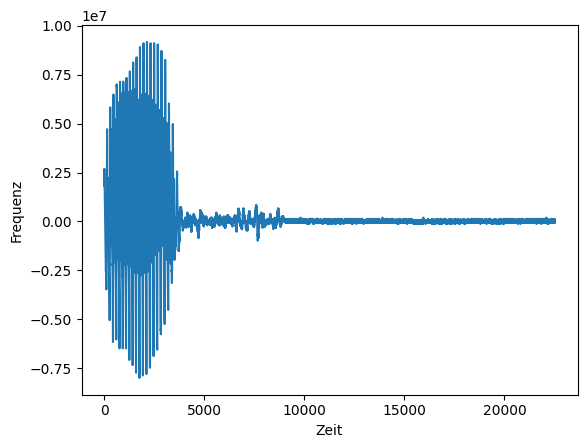

Detla t =  4.438920454545455e-05


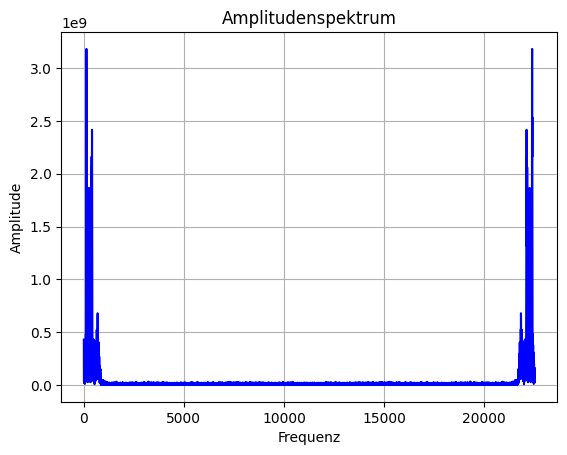

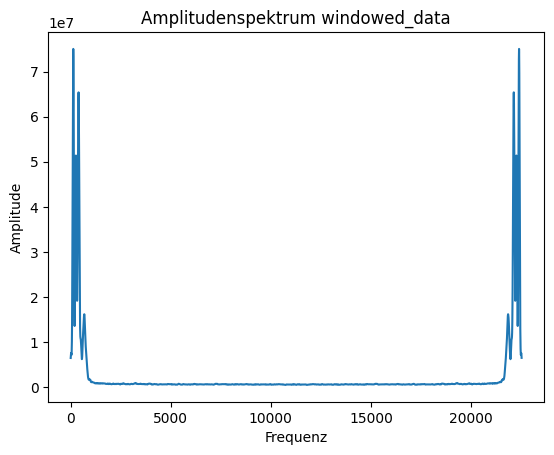

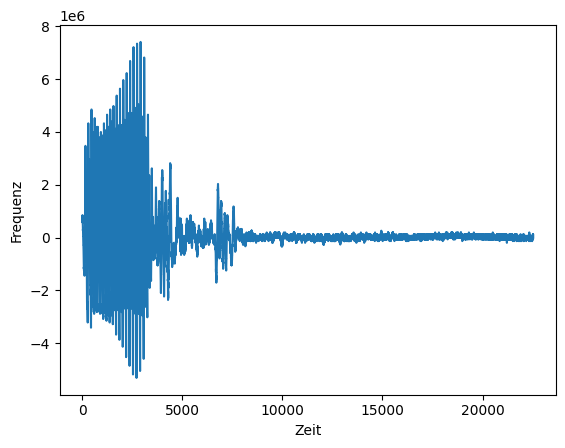

Detla t =  4.438920454545455e-05


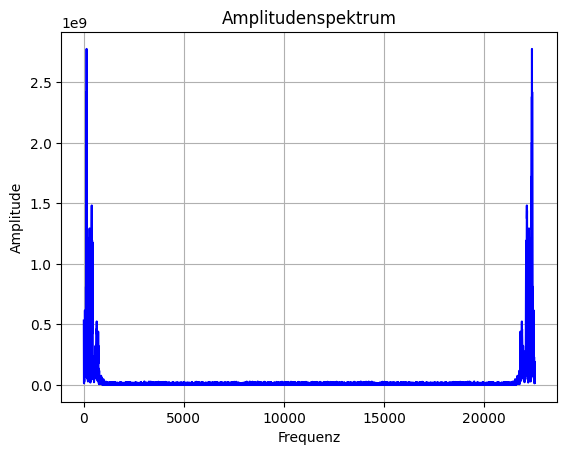

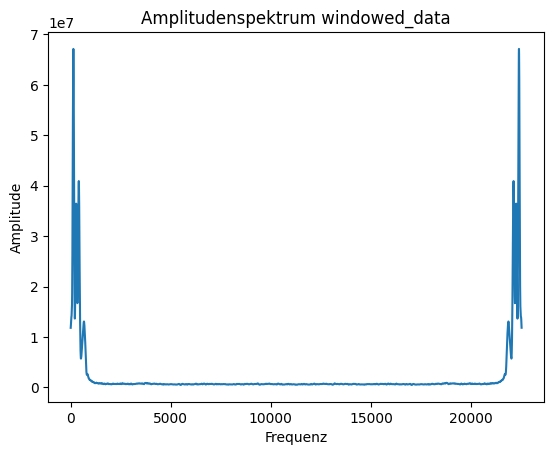

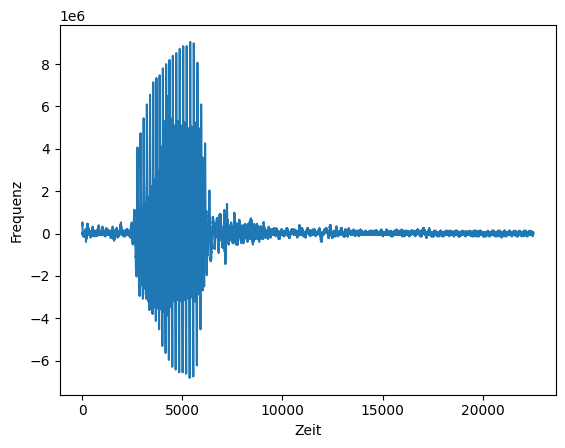

Detla t =  4.438920454545455e-05


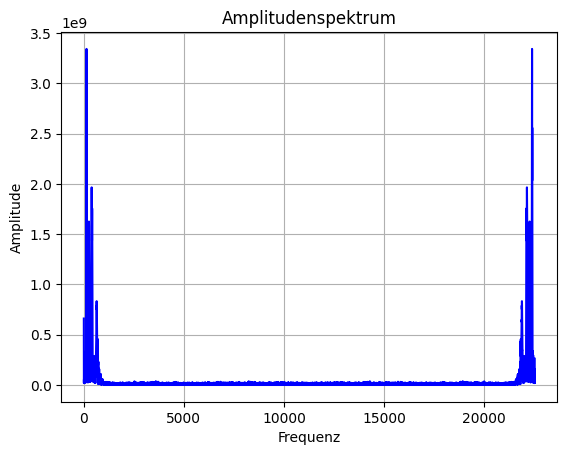

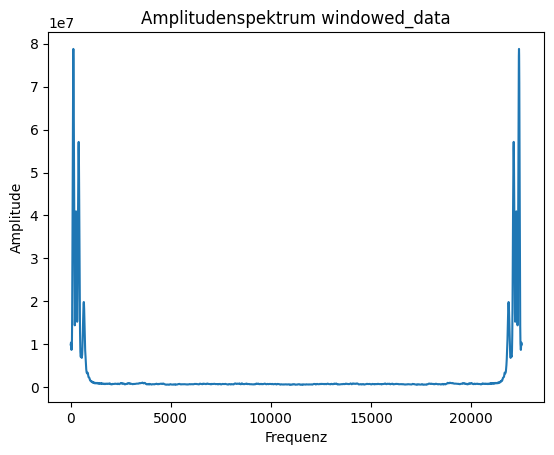

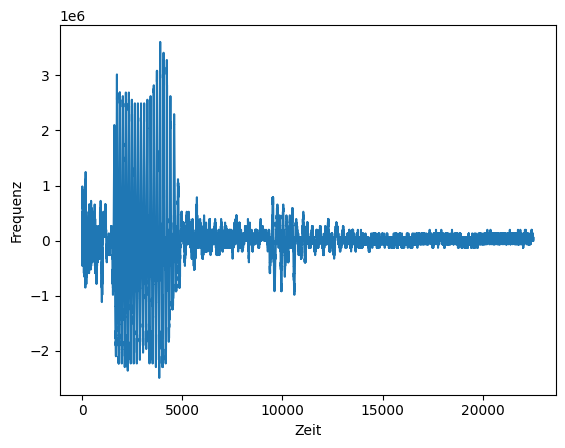

Detla t =  4.438920454545455e-05


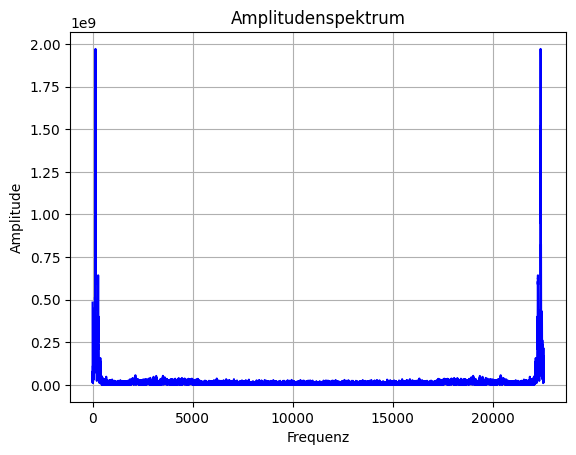

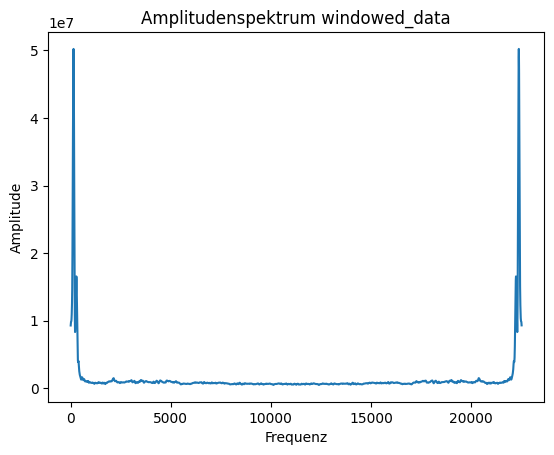

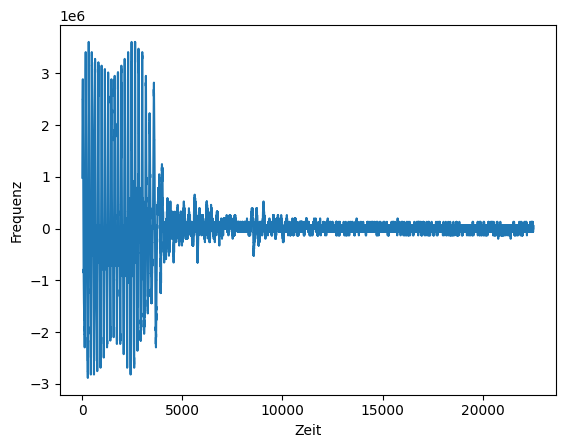

Detla t =  4.438920454545455e-05


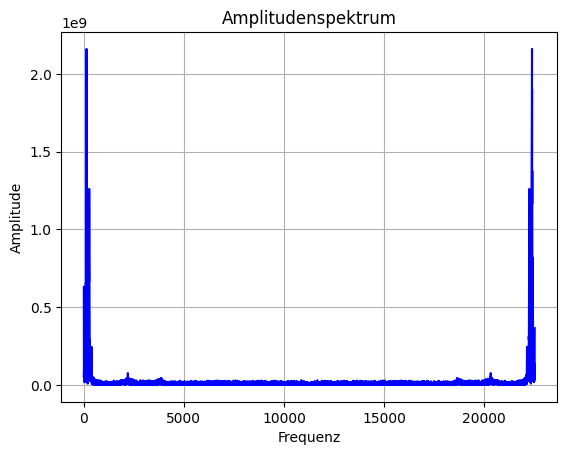

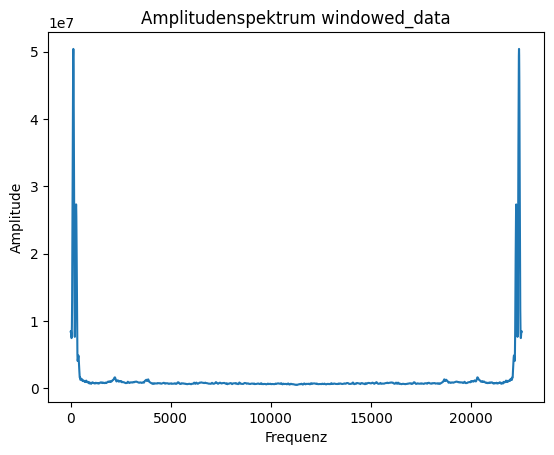

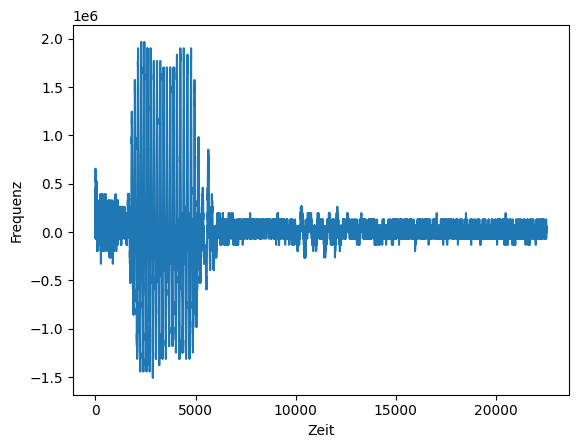

Detla t =  4.438920454545455e-05


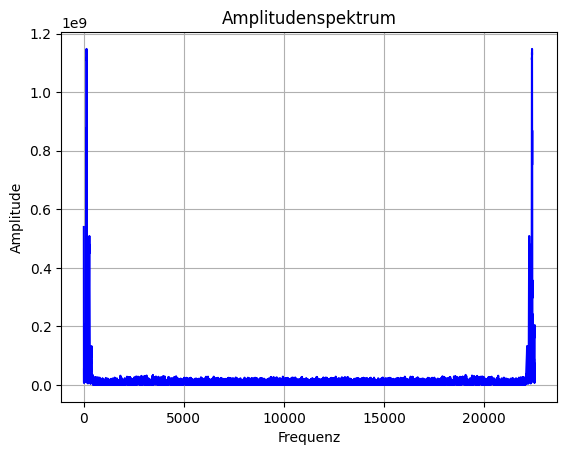

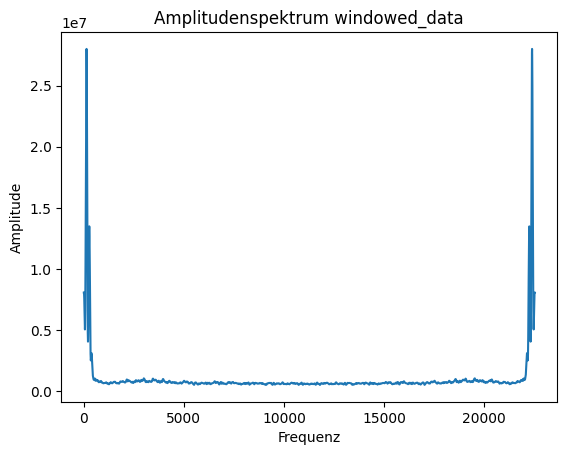

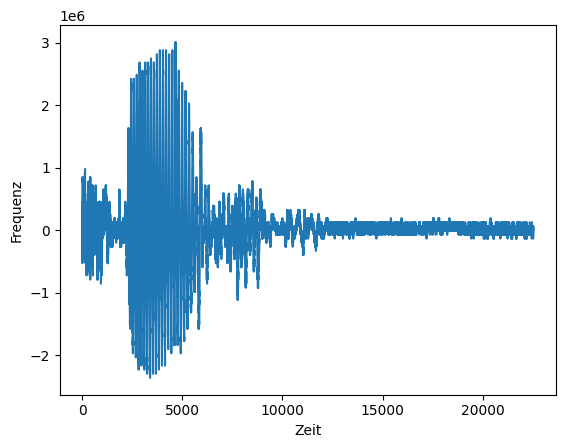

Detla t =  4.438920454545455e-05


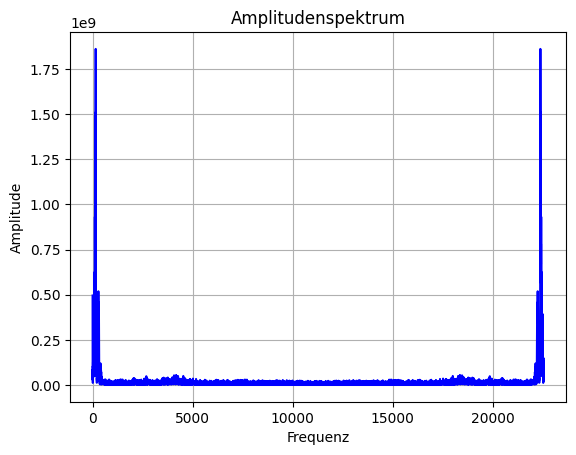

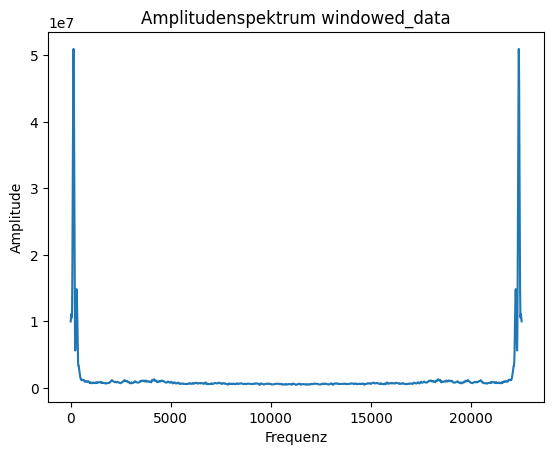

In [3]:
global final_windowed_data
final_windowed_data = []
global count
count = 0

def get_index(data):
    threshold = max(data[:500]) * 3
    i = 0
    for x in data:
        # print(x)
        # print(x > threshold)
        if((x > threshold)):
            return i
        i += 1
    return 0
    

def cut_samples(directory):
    global count
    global final_windowed_data
    pattern = r'^audioaufname_(\d+)'  # Muster, um nach Dateien mit dem Namen 'audio_#' zu suchen

    existing_files = [file for file in os.listdir(directory) if re.match(pattern, file)]
    numbers = []

    for file_name in existing_files:
        match = re.match(pattern, file_name)
        if match:
            # numbers.append(int(match.group(1)))
            data = np.load(directory + '\\' + file_name)
            one_second = int(data.size / 5)
            # print("second: " + str(one_second))
            data = data[15000:]
            # print(max(data[:50]))
            index = get_index(data)
            # print(index)
            data = data[index:]
            data = data[:one_second]

            plt.plot(data)
            plt.ylabel('Frequenz')
            plt.xlabel('Zeit')
            plt.show()


            # Amplitudenspektrum
            #print(data)
            fourier = np.fft.fft(data)
            # print(fourier)
            
            spektrum = np.abs(fourier)
            #delta_t = 0.000005
            delta_t = np.abs(1 / one_second)
            print("Detla t = ", delta_t)
            
            
            freq = range(0, len(data), 1) / (len(data) * delta_t)
            
            plt.plot(freq, spektrum, 'b')
            plt.title('Amplitudenspektrum')
            plt.ylabel('Amplitude')
            plt.xlabel('Frequenz')
            plt.grid(True)
            plt.show()


            # d) 
            windowed_data = windowing_func(data)
            #np.append(final_windowed_data, windowed_data)
            final_windowed_data.append(windowed_data)
            # final_windowed_data[count] = windowed_data
            count += 1
            plt.plot(windowed_data);
            plt.title('Amplitudenspektrum windowed_data')
            plt.ylabel('Amplitude')
            plt.xlabel('Frequenz')
            plt.show()

            # save for 2
        	


cut_samples(r'Trainingsdaten')
#cut_samples(r'Trainingsdaten')
cut_samples(r'TestdatenTobi')
#cut_samples(r'TestdatenTobi')
cut_samples(r'TestdatenJona')

# 2. Spracherkennung

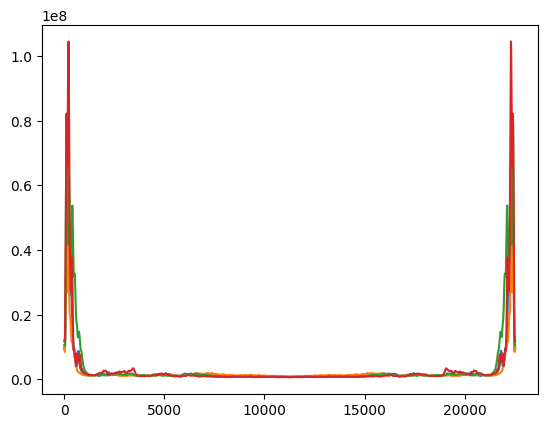

In [4]:
# a)
#print(final_windowed_data)
#print(final_windowed_data[0:5])
mean_hoch = np.mean(final_windowed_data[0:5], axis = 0)
mean_tief = np.mean(final_windowed_data[5:10], axis = 0)
mean_links = np.mean(final_windowed_data[10:15], axis = 0)
mean_rechts = np.mean(final_windowed_data[15:20], axis = 0)
plt.plot(mean_hoch)
plt.plot(mean_tief)
plt.plot(mean_links)
plt.plot(mean_rechts)
#plt.xlim([0,4000]);

In [5]:
#  c)
def my_pearsonr(x, y):
    # Berechnung der Korrelation
    mean_x, mean_y = np.mean(x), np.mean(y)
    x_deviation = x - mean_x
    y_deviation = y - mean_y
    covariance = np.sum(x_deviation * y_deviation)
    std_x = np.sqrt(np.sum(x_deviation ** 2))
    std_y = np.sqrt(np.sum(y_deviation ** 2))

    pearson_corr = covariance / (std_x * std_y)

    # Berechnung des p-Werts
    n = len(x)
    dof = n - 2  # Freiheitsgrade
    t_stat = pearson_corr * np.sqrt(dof / (1 - pearson_corr**2))
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), dof))

    return pearson_corr

print("Vergleich")
cor_hoch = sp.stats.pearsonr(final_windowed_data[20], mean_hoch)
cor_tief = sp.stats.pearsonr(final_windowed_data[25], mean_tief)
cor_links = sp.stats.pearsonr(final_windowed_data[30], mean_links)
cor_rechts = sp.stats.pearsonr(final_windowed_data[35], mean_rechts)

print(f"Korrelation Hoch: {cor_hoch[0]}")
print(f"Korrelation Tief: {cor_tief[0]}")
print(f"Korrelation Links: {cor_links[0]}")
print(f"Korrelation Rechts: {cor_rechts[0]}")


print("Eigenimplementierung")
cor_hoch = my_pearsonr(final_windowed_data[20], mean_hoch)
cor_tief = my_pearsonr(final_windowed_data[25], mean_tief)
cor_links = my_pearsonr(final_windowed_data[30], mean_links)
cor_rechts = my_pearsonr(final_windowed_data[35], mean_rechts)

print(f"Korrelation Hoch: {cor_hoch}")
print(f"Korrelation Tief: {cor_tief}")
print(f"Korrelation Links: {cor_links}")
print(f"Korrelation Rechts: {cor_rechts}")

Vergleich
Korrelation Hoch: 0.8380270366120923
Korrelation Tief: 0.9212229397720592
Korrelation Links: 0.9252393038654284
Korrelation Rechts: 0.8584577203802453
Eigenimplementierung
Korrelation Hoch: 0.8380270366120919
Korrelation Tief: 0.9212229397720573
Korrelation Links: 0.9252393038654283
Korrelation Rechts: 0.858457720380245


In [6]:
# d)
def spracherkenner(spektrum):
    referenz_spektren = [mean_hoch, mean_tief, mean_links, mean_rechts]
    cor = 0
    idx = 0
    befehl = ""
    for i in range(len(referenz_spektren)):
        temp_cor = my_pearsonr(spektrum, referenz_spektren[i])
        if temp_cor > cor:
            cor = temp_cor
            idx = i
    if idx == 0:
        befehl = "hoch"
    elif idx == 1:
        befehl = "tief"
    elif idx == 2:
        befehl = "links"
    else:
        befehl = "rechts"
    return befehl

In [7]:
global korrekt_erkannt
korrekt_erkannt = 0
global nicht_erkannt
nicht_erkannt = 0
def berechnung(von, bis, wort):
    global korrekt_erkannt
    global nicht_erkannt
    for data in final_windowed_data[von:bis]:
        ergebnis = spracherkenner(data)
        if ergebnis == wort:
            korrekt_erkannt += 1
        else:
            nicht_erkannt += 1
        print(ergebnis)

In [8]:
korrekt_erkannt = 0
nicht_erkannt = 0
print("Sollte hoch:")
berechnung(20, 25, "hoch")
print("Sollte tief:")
berechnung(25, 30, "tief")
print("Sollte links:")
berechnung(30, 35, "links")
print("Sollte rechts:")
berechnung(35, 40, "rechts")

print("Statistik richtig erkannter Befehle Tobi:")
print("Korrekt erkannt: " + str(korrekt_erkannt))
print("Nicht erkannt: " + str(nicht_erkannt))
print("Insgesamt richtig erkannt: " + str((korrekt_erkannt / 20) * 100) + "%")

Sollte hoch:
links
hoch
rechts
rechts
rechts
Sollte tief:
rechts
rechts
links
links
tief
Sollte links:
tief
links
links
links
links
Sollte rechts:
links
tief
hoch
hoch
hoch
Statistik richtig erkannter Befehle Tobi:
Korrekt erkannt: 6
Nicht erkannt: 14
Insgesamt richtig erkannt: 30.0%


In [9]:
korrekt_erkannt = 0
nicht_erkannt = 0

print("Sollte hoch:")
berechnung(40, 45, "hoch")
print("Sollte tief:")
berechnung(45, 50, "tief")
print("Sollte links:")
berechnung(50, 55, "links")
print("Sollte rechts:")
berechnung(55, 60, "rechts")

print("Statistik richtig erkannter Befehle Jona:")
print("Korrekt erkannt: " + str(korrekt_erkannt))
print("Nicht erkannt: " + str(nicht_erkannt))
print("Insgesamt richtig erkannt: " + str((korrekt_erkannt / 20) * 100) + "%")

Sollte hoch:
links
hoch
hoch
hoch
hoch
Sollte tief:
hoch
hoch
hoch
tief
tief
Sollte links:
links
links
links
links
links
Sollte rechts:
links
hoch
tief
hoch
hoch
Statistik richtig erkannter Befehle Jona:
Korrekt erkannt: 11
Nicht erkannt: 9
Insgesamt richtig erkannt: 55.00000000000001%


In [10]:
korrekt_erkannt = 0
nicht_erkannt = 0
print("Sollte hoch:")
berechnung(20, 25, "hoch")
print("Sollte tief:")
berechnung(25, 30, "tief")
print("Sollte links:")
berechnung(30, 35, "links")
print("Sollte rechts:")
berechnung(35, 40, "rechts")

print("Sollte hoch:")
berechnung(40, 45, "hoch")
print("Sollte tief:")
berechnung(45, 50, "tief")
print("Sollte links:")
berechnung(50, 55, "links")
print("Sollte rechts:")
berechnung(55, 60, "rechts")

print("Statistik richtig erkannter Befehle:")
print("Korrekt erkannt: " + str(korrekt_erkannt))
print("Nicht erkannt: " + str(nicht_erkannt))
print("Insgesamt richtig erkannt: " + str((korrekt_erkannt / 40) * 100) + "%")

Sollte hoch:
links
hoch
rechts
rechts
rechts
Sollte tief:
rechts
rechts
links
links
tief
Sollte links:
tief
links
links
links
links
Sollte rechts:
links
tief
hoch
hoch
hoch
Sollte hoch:
links
hoch
hoch
hoch
hoch
Sollte tief:
hoch
hoch
hoch
tief
tief
Sollte links:
links
links
links
links
links
Sollte rechts:
links
hoch
tief
hoch
hoch
Statistik richtig erkannter Befehle:
Korrekt erkannt: 17
Nicht erkannt: 23
Insgesamt richtig erkannt: 42.5%
